<a href="https://colab.research.google.com/github/flysaurus/PumpitUp/blob/master/PumpitUp_E2E_MLv0_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Understand the business problem
## Pump It Up
* **Objective**: Predict which water pumps are faulty
Using data from Taarifa and the Tanzanian Ministry of Water, predict which pumps are functional, which need some repairs, and which don't work at all? This is an intermediate-level practice competition. Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/

### Following are the available datasets

**Submission format**	- The format for submitting your predictions

**Test set values**- The independent variables that need predictions

**Training set labels**	- The dependent variable (status_group) for each of the rows in Training set values

**Training set values** - The independent variables for the training set


* How will DS/ML's solution be used? - We will use classification techniques to train the model, and predict.

* What solutions are there in place?
* How will you measure performance?
* Minimum performance required?

**IMPORTANT NOTE:** This is the most important step of the DS/ML project lifecycle. Make sure you define performance metrics and targets.


# 2. Prepare your DS/ML environment

*Why is this step relevant?*

It minimizes the risk of libary conflicts when sharing your project.

https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html

In [ ]:
# Using conda
# The use of ! will allow you to run terminal commands from your notebook

# Option 1: Create new environment from scratch
!conda create -y -n pumpitup python=3.8 ipykernel
!conda activate pumpitp

# Create environment yaml file
!conda env export > pumpitup.yaml

# Option 2: Create environment from yaml file
#!conda create -f pumpitup.yaml

# Option 3: Update an existing enviromment from a yaml file
#!conda env update pumpitup -f pumpitup.yaml


Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... 
  - defaults/noarch::parso-0.8.1-pyhd3eb1b0_0, defaults/win-64::jedi-0.17.0-py38_0
  - defaults/noarch::parso-0.7.0-py_0, defaults/win-64::jedi-0.17.2-py38haa95532_1done

## Package Plan ##

  environment location: C:\Users\mpari\anaconda3\envs\pumpitup

  added / updated specs:
    - ipykernel
    - python=3.8


The following NEW packages will be INSTALLED:

  backcall           pkgs/main/noarch::backcall-0.2.0-pyhd3eb1b0_0
  ca-certificates    pkgs/main/win-64::ca-certificates-2021.1.19-haa95532_0
  certifi            pkgs/main/win-64::certifi-2020.12.5-py38haa95532_0
  colorama           pkgs/main/noarch::colorama-0.4.4-pyhd3eb1b0_0
  decorator          pkgs/main/noarch::decorator-4.4.2-pyhd3eb1b0_0
  ipykernel          pkgs/main/win-64::ipykernel-5.3.4-py38h5ca1d4c_0
  ipython            pkgs/main/win-64::ipython-7.20.0-py38hd

Could not find conda environment: pumpitp
You can list all discoverable environments with `conda info --envs`.



^C


# 3. Import libaries

In [ ]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import time
import seaborn as sns
%matplotlib inline
# Visit https://ipython.readthedocs.io/en/stable/interactive/plotting.html for information on %matplotlib

import seaborn as sns

# Hide warnings if you are presenting your project to an audience to make your code look cleaner
import warnings
warnings.filterwarnings("ignore")
# Visit https://docs.python.org/3/library/warnings.html for information on warning control

# 4. Get data

* Find data and document sources
* Check for space
>* If RAM > datafile size, then do batch training
>* If RAM < datafile size, then do online training

* Check  terms and conditions
* If applicable: get access
* Create workspace / define storage location
* Get data
* Deal with sensitive information (delete, protect, anonymize)
* Sample test set


In [ ]:
# Option 1: Import data from file

# Read Train Values (X) and Labels (y)
Train_X_raw = pd.read_csv('Train_Set_Values.csv')
Train_y_raw = pd.read_csv('Train_Set_Labels.csv')
df_pred = pd.read_csv('Test_Set_Values_Need_Pred.csv')

# 4. Explore data to gain insights

Look for:
* Target variable (for supervised learning)
* Size of dataset (to ensure if fits in memory)
* Number of variables (to estimate model complexity and processing)
* Variable data types (important for choosing visualizations and transformations)
* Missing values
* Cardinality (categorical variables)
* Rare values (categorical variables)
* Distributions (skewness/kurtosis)
* Scale
* Outliers
* Correlations (pay particular attention in correlations with target variable)


In [ ]:
## Size, variables and dtypes
Train_X_raw.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [ ]:
# Missing values
Train_X_raw.isnull().mean().sort_values(ascending=False)*100

scheme_name              47.417508
scheme_management         6.526936
installer                 6.153199
funder                    6.119529
public_meeting            5.612795
permit                    5.144781
subvillage                0.624579
management_group          0.000000
waterpoint_type           0.000000
extraction_type           0.000000
extraction_type_group     0.000000
source_class              0.000000
extraction_type_class     0.000000
management                0.000000
source_type               0.000000
source                    0.000000
payment_type              0.000000
water_quality             0.000000
construction_year         0.000000
quality_group             0.000000
quantity                  0.000000
quantity_group            0.000000
payment                   0.000000
id                        0.000000
amount_tsh                0.000000
recorded_by               0.000000
population                0.000000
ward                      0.000000
lga                 

# Missing Values:

### We have 7 columns with null values with scheme_name with the highest % at 47%
- scheme_name              47.417508
- scheme_management         6.526936
- installer                 6.153199
- funder                    6.119529
- public_meeting            5.612795
- permit                    5.144781
- subvillage                0.624579

**All of our columns with missing values are categorical columns**

Also, We do NOT want to consider any columns that have > 10% null values, and in addition name of the well will not have any impact on the dependent variable (y). 

We will drop scheme_name column

In [ ]:
# Cardinality
Train_X_raw.describe(include='O') # includes categorical column as well 'o'

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,...,7,8,6,5,5,10,7,3,7,6
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,...,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


When performing feature selection, you can feel safe to remove variables that meet the following conditions:
* Cardinality >= 95% of observations
* Cardinality == 1 (this means you have a constant categorical *variable*)

In our results none of the columns have cardinality >= 95%

In [ ]:
# Rare values (for categorical ONLY)
Train_X_raw.nunique() # by default axis = 0 means identified unique by columns if axis = 1 # of unique rows

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

In [ ]:
# Rare values (for categorical ONLY)
print(Train_y_raw['status_group'].unique()) # by default axis = 0 means identified unique by columns if axis = 1 # of unique rows

['functional' 'non functional' 'functional needs repair']


In [ ]:
print(Train_y_raw['status_group'].unique()) # by default axis = 0 means identified unique by columns if axis = 1 # of unique rows

['functional' 'non functional' 'functional needs repair']


In [ ]:
# Distributions, scale, and outliers
Train_X_raw.describe()
# For distributions, look for differences in mean vs std vs percentiles
# For scale, look for different orders of magnitud between variables' min/max

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [ ]:
# Distributions only (for outliers, values further away from zero indicate more extreme outliers) 
Train_X_raw.skew().sort_values(ascending=False)

num_private          91.933750
amount_tsh           57.807800
population           12.660714
district_code         3.962045
region_code           3.173818
gps_height            0.462402
id                    0.002623
latitude             -0.152037
construction_year    -0.634928
permit               -0.819382
public_meeting       -2.861945
longitude            -4.191046
dtype: float64

Looks like below 5 columns are most skewed - which is quite evident in the earlier describe as mean is quite away from max and std dev is much further away from mean.

- num_private          91.933750
- amount_tsh           57.807800
- population           12.660714
- district_code         3.962045
- region_code           3.173818


In [ ]:
# Let's take a look at categorical values now
Train_X_raw.describe(include = ['O'])

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,...,7,8,6,5,5,10,7,3,7,6
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,...,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


<AxesSubplot:>

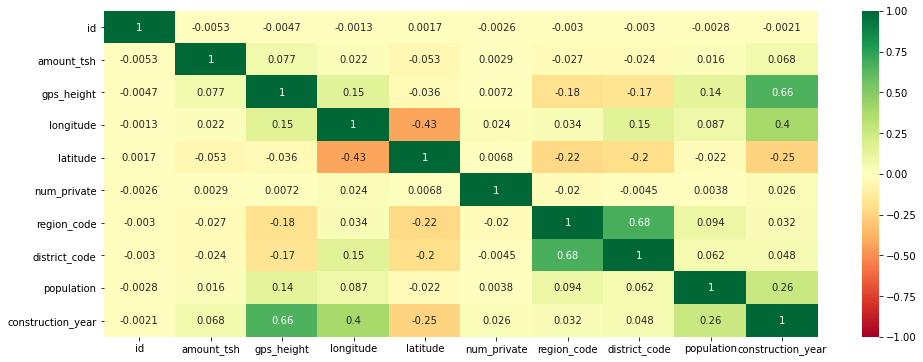

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(Train_X_raw.corr(), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')

**Noticeable correlation between **
- region_code and district_code - 0.68
- construction_year and gps_height - 0.66
- population and construction year - 0.26
- latitude and longitude (-ve) not worth exploring

**None of the above have null values**


# 5. Prepare your data (*create transformers' pipeline*)

## *Important notes:*
1. Split your dataset in train and test before applying any fit method.
2. fit ONLY training data
3. Transform both train and test


In [ ]:
# Convert date_recorded from date object to integer
Train_X_raw['date_recorded'] = pd.to_datetime(Train_X_raw["date_recorded"]).dt.strftime("%Y%m%d")
df_pred['date_recorded'] = pd.to_datetime(df_pred["date_recorded"]).dt.strftime("%Y%m%d")

In [ ]:
# Perform EDA
# More advanced profiling using pandas profiling

# Check for .pickle
filename = 'output_pump.html'
found = False
try: 
    infile = open(filename,'rb')
    infile.close()
    found = True
    print('Profile file found')
except:
    print('Profile not found!')

if not found:
    # Perform profiling
    from pandas_profiling import ProfileReport
    prof = ProfileReport(Train_X_raw)
    prof.to_file(output_file='output_pump.html')

Profile file found


#### Through Panda's profiling report we know following are the numerical features that have 0 in there. We will discard a few and impute others
* Amount_tsh - 70.1%
* Gps_height - 34.4%
* Longitude - 3.1%
* Num_private - 98.7% (DROP this deature)
* District_code - <0.1%
* Population - 36%
* Construction_year - 34.9%

* Observation 1 - Through a review of Pandas profiling - phik correlation it is alos evident that construction_year and GPS_height are highly corrleated. Also, construction_year, GPS_height are also individually highly correlated to region. Thus we will drop construction_year and impute GPS_height.

* Observation 2 - Also, management and scheme_management are highly correlated as well. We will drop scheme_management

* Observation 3 - Longitude and latitude are highly correlated to region. We will drop longitude and latitude

* Observation 4 - basin and region are highly correlated. We will drop basin

* Observation 5 - Let's drop region code as it is highly correlated with region

* Observation 6 - extraction_type, extraction_type_group and extraction_type_class are highly correlated. Let's drop extraction_type and extraction_type_group

* Observation 7 - management and management_group are highly correlated. Let's drop managemet_group

* Observation 8 - payment and payment_type are highly correlated. Let's drop payment

* Observation 9 - water_quality and quality_group are highly correlated. Let's drop quality_group

* Observation 10 - quanity and quanity_group are highly correlated. Let's drop quantity_group

* Observation 11 - source, source_type and source_class are highly correlated. LEt's drop source and source_type

* Observation 12 - waterpoint_type and waterpoint_type_group are highly correlated. Let's drop waterpoint_type_group

* Observation 13 - recorded_by contains a single value - drop the column

#### Dropping features - let's also try  DropDuplicateFeatures()

In [ ]:
# Drop features as per above observation
Train_X_raw = Train_X_raw.drop(['id','scheme_name', 'num_private','construction_year','scheme_management','longitude',
                                'latitude','basin','region_code','extraction_type','extraction_type_group',
                                'management_group','payment','quality_group','quantity_group','source',
                                'source_type','waterpoint_type_group','recorded_by'],axis=1)

df_pred = df_pred.drop(['id','scheme_name', 'num_private','construction_year','scheme_management','longitude',
                                'latitude','basin','region_code','extraction_type','extraction_type_group',
                                'management_group','payment','quality_group','quantity_group','source',
                                'source_type','waterpoint_type_group','recorded_by'],axis=1)

Train_y_raw.drop('id', axis=1, inplace=True)
Train_X_raw.describe

KeyError: "['ID'] not found in axis"

In [ ]:
Train_y_raw.drop('id', axis=1, inplace=True)

## 5.1 Feature engineering
* Missing values
* Label encoding
* Outlier handling
* Scaling
* Dimensionality reduction

### 5.1.1 Missing Values - Numerical and Categorical **Imputer**



In [ ]:
# Take care of ordinal data by converting 0 to NaN and then imputing
Train_X_raw.replace(0, np.nan, inplace=True)
df_pred.replace(0, np.nan, inplace=True)
Train_X_raw.isnull().sum()

amount_tsh               41639
date_recorded                0
funder                    3635
gps_height               20438
installer                 3655
wpt_name                     0
subvillage                 371
region                       0
district_code               23
lga                          0
ward                         0
population               21381
public_meeting            8389
permit                   20548
extraction_type_class        0
management                   0
payment_type                 0
water_quality                0
quantity                     0
source_class                 0
waterpoint_type              0
dtype: int64

Handling missing values:
https://feature-engine.readthedocs.io/en/latest/imputation/index.html

### 5.1.1.1 No need for Numerical Imputer as none of the numerical columns have missing values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Train_X_raw, Train_y_raw, test_size=0.30, random_state=42)

### 5.1.1.2 Impute Cateogrical Columns

##### All of our missing value columns are categorical in nature. 

Also we will use KNNImputer instead of coding them as "missing". 

1. For us to use KNNImputer as a first step, categorical values need to be encoded into numericals.

2. After that we will run KNN Imputer

Columns to be imputed
- scheme_management         
- installer                 
- funder                    
- public_meeting            
- permit                    
- subvillage                

In [ ]:
X_train.isnull().sum()

amount_tsh               29168
date_recorded                0
funder                    2527
gps_height               14210
installer                 2536
wpt_name                     0
subvillage                 264
region                       0
district_code               17
lga                          0
ward                         0
population               14877
public_meeting            5948
permit                   14412
extraction_type_class        0
management                   0
payment_type                 0
water_quality                0
quantity                     0
source_class                 0
waterpoint_type              0
dtype: int64

In [ ]:
# Encode and Impute - 
# 1. the process to pull non-null data, encode it and return it to the dataset is below.
# 2. impute the missing values using KNN - ExtraTreesRegressor
# https://towardsdatascience.com/preprocessing-encode-and-knn-impute-all-categorical-features-fast-b05f50b4dfaa

# instantiate both packages to use
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
#from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder

cat_encoder = OrdinalEncoder()
cat_imputer = IterativeImputer(ExtraTreesRegressor())

# encode y data
cat_encoder.fit(y_train)
y_train = pd.DataFrame(cat_encoder.transform(y_train),
                            columns = y_train.columns)
y_test = pd.DataFrame(cat_encoder.transform(y_test),
                            columns = y_test.columns) 


# Create a list of categorical columns to iterate over to encode and prepare for imputing
cat_cols = ['funder','installer','subvillage','public_meeting','permit', 'wpt_name',
            'region','lga','ward','extraction_type_class','management',
            'payment_type','water_quality','quantity','source_class','waterpoint_type']

# Define the process to pull non-null data, encode it and return it to the 
# dataset
def encode_for_imputing(data):
    ''' function to encode non-null data and replace it in the original data'''
    #retains only non-null values in a single row multiple columns
    nonulls = np.array(data.dropna())
    #print('nonulls ', nonulls)
    #reshapes the data for encoding - converts into one column multiple rows
    impute_reshape = nonulls.reshape(-1,1) # (-1,1) means unknows rows adn 1 column shape
    #print('impute reshape ', impute_reshape)
    #encode data
    impute_ordinal = cat_encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()]=np.squeeze(impute_ordinal)
    return data

# Create a for loop to interate through each columns in the data
for columns in cat_cols:
    encode_for_imputing(X_train[columns])
    encode_for_imputing(X_test[columns])
    encode_for_imputing(df_pred[columns])

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

ValueError: Found unknown categories [0, 3, 5, 7, 9, 12, 20, 22, 23, 27, 33, 40, 43, 44, 45, 50, 51, 52, 69, 70, 71, 75, 78, 79, 84, 93, 94, 95, 96, 97, 98, 114, 116, 122, 123, 124, 132, 134, 136, 139, 144, 145, 147, 148, 152, 157, 162, 168, 176, 179, 180, 189, 190, 193, 199, 200, 210, 214, 221, 224, 230, 233, 235, 237, 244, 245, 246, 250, 253, 258, 260, 262, 275, 279, 280, 281, 283, 285, 291, 297, 300, 312, 326, 330, 334, 342, 343, 345, 353, 361, 363, 369, 373, 392, 393, 394, 398, 401, 402, 414, 415, 430, 437, 444, 447, 454, 455, 456, 458, 461, 462, 468, 476, 482, 483, 484, 488, 492, 495, 510, 511, 513, 515, 516, 520, 525, 527, 532, 534, 535, 541, 544, 553, 555, 557, 558, 560, 562, 564, 575, 585, 587, 590, 592, 593, 595, 597, 599, 600, 603, 614, 616, 622, 630, 632, 637, 640, 644, 645, 649, 651, 655, 659, 674, 675, 678, 680, 684, 686, 693, 710, 714, 715, 725, 729, 732, 736, 738, 741, 742, 744, 746, 747, 763, 764, 767, 772, 773, 778, 782, 791, 802, 808, 821, 825, 827, 834, 836, 842, 846, 850, 851, 859, 863, 866, 867, 879, 881, 888, 900, 903, 909, 910, 916, 919, 926, 929, 937, 939, 948, 950, 951, 956, 961, 971, 978, 980, 982, 983, 984, 988, 989, 1008, 1011, 1019, 1027, 1030, 1032, 1034, 1038, 1041, 1054, 1057, 1061, 1063, 1069, 1071, 1074, 1075, 1076, 1079, 1082, 1087, 1088, 1089, 1091, 1092, 1114, 1115, 1116, 1124, 1126, 1127, 1130, 1138, 1141, 1146, 1148, 1150, 1151, 1152, 1166, 1169, 1173, 1181, 1182, 1185, 1192, 1196, 1200, 1203, 1206, 1208, 1214, 1216, 1220, 1225, 1226, 1229, 1241, 1245, 1247, 1249, 1254, 1255, 1266, 1277, 1279, 1281, 1284, 1285, 1286, 1288, 1297, 1302, 1303, 1304, 1305, 1308, 1311, 1314, 1316, 1321, 1322, 1325, 1326, 1333, 1335, 1337, 1338, 1339, 1346, 1348, 1352, 1353, 1356, 1360, 1366, 1369, 1371, 1381, 1382, 1389, 1395, 1400, 1406, 1408, 1414, 1427, 1429, 1433, 1437, 1441, 1443, 1451, 1453, 1455, 1459, 1460, 1461, 1465, 1473, 1481, 1484, 1486, 1491, 1502, 1509, 1510, 1513, 1516, 1517, 1526, 1535, 1541, 1547, 1548, 1556, 1559, 1563, 1564, 1573, 1577, 1578, 1579, 1582, 1583, 1590, 1594, 1610, 1614, 1615, 1618, 1638, 1640, 1641, 1645, 1652, 1659, 1662, 1668, 1669, 1682, 1683, 1686, 1688, 1693, 1695, 1696, 1697, 1701, 1702, 1705, 1708, 1710, 1713, 1725, 1728, 1729, 1730, 1731, 1732, 1733, 1735, 1740, 1742, 1747, 1750, 1752, 1760, 1773, 1775, 1791, 1800, 1806, 1808, 1810, 1812, 1813, 1817, 1820, 1823, 1829, 1835, 1836, 1841, 1845, 1846, 1859, 1874, 1876, 1886, 1888, 1890, 1891, 1894, 1900, 1902, 1911, 1912, 1916, 1918, 1920, 1921, 1928, 1943, 1947, 1954, 1963, 1966, 1973, 1975, 1979, 1982, 1989, 1994, 1995, 1997, 1999, 2010, 2015, 2018, 2026, 2028, 2029, 2031, 2033, 2035, 2042, 2046, 2055, 2057, 2060, 2061, 2065, 2074, 2077, 2090, 2091, 2094, 2097, 2098, 2106, 2107, 2110, 2111, 2113, 2117, 2118, 2121, 2122, 2127, 2129, 2130, 2133, 2137, 2143, 2149, 2165, 2168, 2169, 2171, 2182, 2183, 2184, 2192, 2201, 2209, 2214, 2221, 2224, 2229, 2234, 2242, 2244, 2251, 2254, 2258, 2265, 2269, 2270, 2280, 2282, 2289, 2294, 2296, 2297, 2299, 2307, 2309, 2312, 2315, 2325, 2327, 2329, 2332, 2337, 2339, 2350, 2352, 2354, 2363, 2364, 2365, 2379, 2384, 2388, 2391, 2392, 2393, 2396, 2397, 2400, 2404, 2405, 2410, 2416, 2419, 2423, 2425, 2430, 2436, 2441, 2443, 2450, 2453, 2455, 2461, 2462, 2464, 2474, 2483, 2485, 2489, 2496, 2500, 2504, 2510, 2514, 2517, 2522, 2529, 2533, 2537, 2538, 2541, 2545, 2550, 2552, 2555, 2561, 2567, 2568, 2570, 2574, 2588, 2595, 2598, 2600, 2606, 2607, 2612, 2614, 2618, 2620, 2630, 2635, 2642, 2645, 2649, 2654, 2656, 2660, 2662, 2667, 2669, 2682, 2684, 2687, 2690, 2693, 2695, 2703, 2704, 2705, 2707, 2713, 2717, 2730, 2736, 2739, 2744, 2752, 2766, 2767, 2770, 2784, 2792, 2805, 2806, 2816, 2817, 2818, 2819, 2820, 2828, 2835, 2842, 2844, 2850, 2858, 2873, 2878, 2879, 2883, 2885, 2887, 2889, 2892, 2895, 2896, 2900, 2901, 2903, 2904, 2905, 2912, 2922, 2927, 2934, 2935, 2942, 2953, 2954, 2956, 2957, 2958, 2963, 2964, 2965, 2967, 2972, 2973, 2974, 2983, 2990, 2993, 2996, 3002, 3004, 3005, 3006, 3013, 3019, 3030, 3031, 3032, 3034, 3036, 3041, 3042, 3044, 3054, 3057, 3058, 3068, 3070, 3071, 3073, 3074, 3076, 3077, 3082, 3083, 3086, 3094, 3095, 3098, 3099, 3100, 3103, 3109, 3110, 3113, 3114, 3120, 3128, 3132, 3146, 3153, 3155, 3159, 3165, 3171, 3174, 3175, 3181, 3184, 3185, 3195, 3197, 3201, 3204, 3207, 3213, 3214, 3234, 3238, 3241, 3243, 3248, 3250, 3253, 3256, 3258, 3259, 3264, 3266, 3272, 3276, 3277, 3278, 3279, 3286, 3287, 3292, 3295, 3296, 3303, 3304, 3305, 3307, 3316, 3317, 3320, 3322, 3323, 3324, 3330, 3333, 3334, 3335, 3337, 3339, 3340, 3346, 3354, 3356, 3357, 3358, 3359, 3360, 3365, 3366, 3368, 3369, 3381, 3386, 3394, 3395, 3403, 3408, 3415, 3417, 3428, 3433, 3435, 3436, 3442, 3446, 3470, 3471, 3473, 3477, 3478, 3485, 3500, 3502, 3504, 3512, 3513, 3514, 3516, 3518, 3528, 3535, 3549, 3559, 3567, 3568, 3569, 3578, 3581, 3582, 3584, 3586, 3587, 3589, 3590, 3594, 3595, 3596, 3600, 3610, 3619, 3620, 3623, 3626, 3631, 3642, 3647, 3650, 3654, 3656, 3659, 3662, 3665, 3666, 3667, 3673, 3674, 3676, 3678, 3685, 3688, 3692, 3694, 3699, 3704, 3705, 3710, 3712, 3714, 3733, 3738, 3740, 3746, 3747, 3748, 3749, 3751, 3752, 3753, 3755, 3758, 3759, 3760, 3762, 3763, 3767, 3772, 3780, 3790, 3794, 3795, 3811, 3814, 3815, 3821, 3825, 3826, 3827, 3832, 3833, 3841, 3857, 3859, 3869, 3870, 3873, 3880, 3889, 3894, 3896, 3903, 3906, 3907, 3909, 3910, 3911, 3916, 3919, 3924, 3928, 3937, 3946, 3947, 3961, 3962, 3964, 3965, 3970, 3974, 3978, 3983, 3985, 3986, 3997, 3999, 4001, 4008, 4018, 4022, 4024, 4025, 4026, 4029, 4030, 4031, 4036, 4039, 4041, 4048, 4049, 4052, 4057, 4061, 4062, 4070, 4071, 4075, 4079, 4080, 4083, 4086, 4087, 4089, 4097, 4099, 4111, 4116, 4119, 4120, 4131, 4134, 4136, 4137, 4144, 4151, 4155, 4163, 4176, 4185, 4188, 4198, 4200, 4206, 4222, 4232, 4234, 4238, 4240, 4243, 4245, 4246, 4251, 4252, 4255, 4262, 4275, 4277, 4282, 4292, 4296, 4297, 4299, 4303, 4306, 4307, 4310, 4311, 4314, 4315, 4317, 4322, 4323, 4327, 4328, 4333, 4341, 4344, 4349, 4353, 4354, 4357, 4363, 4372, 4380, 4389, 4395, 4404, 4407, 4410, 4428, 4429, 4440, 4441, 4447, 4449, 4452, 4456, 4459, 4462, 4464, 4473, 4478, 4479, 4481, 4483, 4486, 4488, 4490, 4496, 4501, 4510, 4512, 4514, 4524, 4526, 4527, 4534, 4538, 4539, 4540, 4544, 4556, 4562, 4563, 4586, 4591, 4598, 4599, 4605, 4614, 4615, 4617, 4621, 4626, 4631, 4636, 4644, 4648, 4651, 4654, 4656, 4657, 4661, 4662, 4665, 4666, 4667, 4668, 4669, 4675, 4683, 4685, 4687, 4699, 4704, 4709, 4710, 4713, 4716, 4721, 4722, 4723, 4725, 4729, 4733, 4739, 4742, 4743, 4745, 4751, 4754, 4755, 4758, 4759, 4764, 4766, 4773, 4775, 4776, 4777, 4778, 4780, 4786, 4792, 4798, 4805, 4807, 4808, 4809, 4812, 4816, 4824, 4828, 4829, 4834, 4837, 4845, 4846, 4865, 4868, 4874, 4876, 4880, 4882, 4886, 4889, 4890, 4895, 4899, 4903, 4907, 4910, 4914, 4915, 4924, 4945, 4947, 4949, 4959, 4963, 4971, 4973, 4981, 4982, 4987, 4992, 4997, 5009, 5019, 5022, 5029, 5038, 5039, 5042, 5043, 5045, 5047, 5049, 5067, 5071, 5073, 5081, 5083, 5084, 5090, 5094, 5097, 5100, 5102, 5105, 5114, 5116, 5117, 5134, 5140, 5146, 5147, 5152, 5153, 5161, 5164, 5168, 5172, 5175, 5177, 5182, 5192, 5193, 5195, 5199, 5201, 5206, 5207, 5211, 5212, 5216, 5219, 5220, 5225, 5228, 5229, 5234, 5238, 5246, 5248, 5250, 5253, 5254, 5255, 5262, 5268, 5278, 5279, 5280, 5284, 5288, 5292, 5293, 5294, 5308, 5311, 5314, 5322, 5323, 5329, 5333, 5336, 5339, 5341, 5344, 5346, 5352, 5356, 5359, 5361, 5363, 5365, 5369, 5378, 5380, 5387, 5388, 5393, 5402, 5403, 5404, 5414, 5415, 5417, 5418, 5422, 5428, 5432, 5433, 5445, 5452, 5455, 5460, 5462, 5467, 5472, 5475, 5478, 5482, 5484, 5486, 5489, 5492, 5497, 5508, 5509, 5512, 5515, 5519, 5523, 5525, 5541, 5548, 5551, 5553, 5559, 5569, 5575, 5602, 5603, 5609, 5612, 5614, 5625, 5626, 5628, 5638, 5640, 5645, 5646, 5651, 5663, 5666, 5669, 5670, 5676, 5679, 5685, 5687, 5689, 5692, 5697, 5699, 5702, 5710, 5711, 5714, 5715, 5718, 5721, 5722, 5725, 5735, 5736, 5738, 5739, 5743, 5745, 5751, 5754, 5764, 5770, 5774, 5775, 5778, 5780, 5781, 5784, 5786, 5790, 5809, 5813, 5818, 5819, 5820, 5824, 5826, 5827, 5840, 5844, 5846, 5847, 5853, 5856, 5860, 5865, 5866, 5870, 5884, 5885, 5892, 5895, 5897, 5914, 5918, 5920, 5921, 5932, 5944, 5946, 5952, 5953, 5960, 5962, 5964, 5967, 5978, 5987, 5989, 5994, 5996, 6001, 6002, 6004, 6005, 6010, 6011, 6013, 6017, 6019, 6026, 6027, 6033, 6035, 6037, 6051, 6054, 6062, 6064, 6065, 6066, 6072, 6076, 6077, 6082, 6087, 6088, 6089, 6093, 6094, 6097, 6101, 6105, 6109, 6116, 6117, 6119, 6120, 6129, 6130, 6131, 6139, 6147, 6150, 6164, 6174, 6175, 6179, 6180, 6184, 6185, 6187, 6194, 6195, 6197, 6199, 6209, 6215, 6216, 6217, 6218, 6219, 6221, 6224, 6227, 6229, 6235, 6248, 6251, 6253, 6254, 6259, 6263, 6266, 6269, 6271, 6282, 6283, 6284, 6285, 6286, 6289, 6292, 6296, 6301, 6302, 6312, 6314, 6316, 6319, 6322, 6324, 6325, 6326, 6329, 6330, 6340, 6345, 6350, 6355, 6356, 6360, 6362, 6366, 6367, 6378, 6381, 6384, 6389, 6390, 6394, 6397, 6398, 6399, 6406, 6409, 6413, 6416, 6417, 6419, 6420, 6424, 6425, 6426, 6429, 6430, 6432, 6433, 6436, 6439, 6440, 6442, 6447, 6450, 6455, 6456, 6459, 6460, 6461, 6472, 6474, 6478, 6480, 6482, 6495, 6503, 6504, 6510, 6511, 6512, 6516, 6517, 6518, 6519, 6527, 6532, 6535, 6539, 6545, 6547, 6548, 6553, 6557, 6562, 6566, 6569, 6572, 6575, 6583, 6585, 6590, 6595, 6598, 6599, 6601, 6605, 6615, 6627, 6629, 6632, 6637, 6652, 6657, 6658, 6659, 6662, 6670, 6681, 6682, 6685, 6695, 6696, 6706, 6710, 6712, 6718, 6730, 6731, 6733, 6735, 6738, 6740, 6741, 6759, 6764, 6769, 6770, 6776, 6779, 6786, 6793, 6794, 6795, 6807, 6823, 6827, 6831, 6834, 6836, 6838, 6842, 6846, 6849, 6851, 6852, 6853, 6854, 6858, 6861, 6865, 6872, 6879, 6883, 6884, 6891, 6898, 6901, 6903, 6904, 6907, 6909, 6911, 6913, 6915, 6916, 6919, 6921, 6923, 6924, 6925, 6927, 6931, 6939, 6940, 6945, 6946, 6949, 6950, 6954, 6961, 6963, 6970, 6972, 6974, 6975, 6976, 6979, 6989, 6993, 7011, 7016, 7025, 7035, 7046, 7049, 7061, 7064, 7070, 7074, 7075, 7076, 7087, 7092, 7096, 7100, 7101, 7108, 7112, 7116, 7121, 7123, 7124, 7129, 7130, 7131, 7136, 7138, 7146, 7147, 7154, 7158, 7164, 7168, 7182, 7183, 7185, 7188, 7197, 7202, 7206, 7207, 7216, 7219, 7224, 7225, 7227, 7238, 7240, 7243, 7247, 7255, 7259, 7260, 7264, 7280, 7285, 7288, 7292, 7303, 7306, 7308, 7313, 7314, 7317, 7321, 7326, 7327, 7329, 7330, 7332, 7334, 7337, 7338, 7341, 7354, 7355, 7360, 7361, 7367, 7369, 7372, 7374, 7376, 7378, 7379, 7381, 7383, 7384, 7386, 7391, 7392, 7395, 7403, 7404, 7408, 7411, 7414, 7415, 7429, 7434, 7437, 7439, 7446, 7459, 7467, 7469, 7470, 7473, 7474, 7476, 7477, 7479, 7481, 7485, 7489, 7496, 7506, 7510, 7512, 7519, 7522, 7525, 7528, 7530, 7531, 7537, 7538, 7541, 7552, 7557, 7558, 7567, 7568, 7570, 7577, 7579, 7582, 7583, 7585, 7586, 7593, 7607, 7610, 7612, 7619, 7620, 7621, 7623, 7633, 7637, 7647, 7649, 7653, 7654, 7659, 7666, 7681, 7690, 7692, 7702, 7703, 7705, 7714, 7716, 7724, 7725, 7733, 7739, 7743, 7745, 7746, 7750, 7758, 7765, 7766, 7767, 7769, 7775, 7777, 7786, 7789, 7790, 7791, 7801, 7803, 7809, 7811, 7814, 7815, 7817, 7819, 7820, 7828, 7829, 7832, 7838, 7839, 7841, 7844, 7846, 7847, 7868, 7872, 7876, 7879, 7881, 7887, 7889, 7894, 7897, 7901, 7903, 7911, 7929, 7930, 7934, 7939, 7944, 7947, 7952, 7953, 7969, 7970, 7977, 7979, 7983, 7984, 7988, 7991, 7993, 7995, 8000, 8002, 8005, 8006, 8012, 8014, 8019, 8020, 8022, 8025, 8031, 8038, 8040, 8043, 8053, 8055, 8066, 8075, 8080, 8085, 8088, 8101, 8110, 8116, 8118, 8119, 8120, 8128, 8131, 8134, 8135, 8137, 8140, 8144, 8148, 8150, 8152, 8156, 8158, 8164, 8165, 8168, 8170, 8172, 8177, 8178, 8185, 8194, 8197, 8198, 8199, 8202, 8208, 8209, 8213, 8214, 8215, 8217, 8221, 8224, 8239, 8251, 8252, 8257, 8260, 8268, 8269, 8278, 8291, 8292, 8296, 8299, 8309, 8326, 8327, 8328, 8331, 8332, 8334, 8336, 8339, 8344, 8348, 8350, 8353, 8354, 8355, 8356, 8360, 8362, 8364, 8367, 8375, 8379, 8382, 8387, 8391, 8393, 8404, 8411, 8417, 8421, 8423, 8424, 8428, 8430, 8434, 8437, 8441, 8448, 8459, 8464, 8467, 8470, 8476, 8492, 8502, 8504, 8505, 8509, 8517, 8518, 8526, 8528, 8533, 8538, 8545, 8548, 8550, 8552, 8565, 8566, 8570, 8574, 8575, 8576, 8578, 8579, 8584, 8585, 8591, 8597, 8603, 8608, 8615, 8616, 8618, 8628, 8632, 8638, 8639, 8650, 8654, 8661, 8665, 8673, 8676, 8680, 8688, 8695, 8696, 8704, 8706, 8714, 8718, 8723, 8725, 8727, 8728, 8730, 8734, 8737, 8741, 8746, 8751, 8752, 8759, 8762, 8766, 8768, 8772, 8774, 8791, 8797, 8799, 8805, 8814, 8820, 8824, 8826, 8828, 8830, 8832, 8838, 8840, 8845, 8846, 8851, 8861, 8871, 8873, 8875, 8879, 8883, 8885, 8886, 8887, 8889, 8891, 8893, 8894, 8898, 8899, 8901, 8905, 8908, 8911, 8912, 8918, 8923, 8924, 8925, 8927, 8929, 8931, 8933, 8935, 8936, 8938, 8942, 8943, 8948, 8951, 8957, 8958, 8959, 8965, 8971, 8972, 8979, 8982, 8984, 8988, 8994, 9001, 9004, 9005, 9006, 9014, 9016, 9020, 9021, 9025, 9030, 9035, 9036, 9039, 9057, 9068, 9070, 9076, 9078, 9079, 9087, 9088, 9089, 9090, 9103, 9104, 9116, 9117, 9127, 9131, 9132, 9137, 9139, 9142, 9143, 9162, 9168, 9169, 9173, 9184, 9188, 9189, 9194, 9196, 9198, 9201, 9204, 9206, 9220, 9221, 9225, 9227, 9228, 9233, 9237, 9238, 9241, 9242, 9244, 9260, 9262, 9269, 9271, 9276, 9284, 9285, 9290, 9307, 9309, 9311, 9314, 9320, 9322, 9323, 9324, 9329, 9334, 9339, 9342, 9346, 9347, 9351, 9357, 9359, 9362, 9365, 9372, 9374, 9375, 9378, 9382, 9383, 9385, 9397, 9400, 9407, 9408, 9409, 9410, 9417, 9422, 9423, 9426, 9427, 9439, 9445, 9452, 9457, 9470, 9474, 9475, 9479, 9482, 9483, 9485, 9486, 9492, 9496, 9499, 9500, 9506, 9511, 9515, 9525, 9535, 9538, 9540, 9544, 9545, 9546, 9547, 9548, 9551, 9554, 9556, 9573, 9574, 9578, 9580, 9584, 9589, 9591, 9599, 9601, 9603, 9605, 9608, 9609, 9611, 9616, 9617, 9621, 9626, 9627, 9628, 9634, 9640, 9644, 9647, 9648, 9654, 9657, 9662, 9663, 9664, 9666, 9667, 9671, 9678, 9679, 9680, 9681, 9685, 9692, 9693, 9697, 9698, 9700, 9703, 9705, 9708, 9710, 9711, 9714, 9715, 9723, 9728, 9744, 9747, 9749, 9752, 9757, 9759, 9763, 9765, 9770, 9772, 9776, 9777, 9779, 9784, 9786, 9792, 9793, 9797, 9799, 9801, 9814, 9815, 9828, 9829, 9835, 9837, 9839, 9851, 9852, 9858, 9860, 9862, 9868, 9869, 9870, 9872, 9873, 9875, 9876, 9880, 9885, 9887, 9891, 9896, 9908, 9912, 9914, 9919, 9921, 9923, 9925, 9926, 9929, 9930, 9932, 9934, 9939, 9955, 9960, 9965, 9973, 9978, 9979, 9983, 9989, 10002, 10009, 10012, 10015, 10020, 10026, 10036, 10037, 10038, 10041, 10043, 10046, 10047, 10053, 10060, 10067, 10068, 10069, 10074, 10076, 10078, 10079, 10084, 10085, 10090, 10099, 10100, 10107, 10111, 10112, 10134, 10137, 10138, 10139, 10140, 10141, 10143, 10146, 10156, 10160, 10165, 10167, 10170, 10171, 10176, 10178, 10180, 10182, 10183, 10191, 10195, 10196, 10201, 10204, 10206, 10207, 10210, 10211, 10212, 10213, 10218, 10220, 10222, 10230, 10232, 10233, 10237, 10238, 10241, 10246, 10248, 10250, 10251, 10254, 10263, 10266, 10268, 10270, 10273, 10283, 10286, 10287, 10288, 10289, 10293, 10303, 10306, 10310, 10317, 10320, 10323, 10326, 10330, 10334, 10339, 10358, 10359, 10360, 10362, 10365, 10369, 10371, 10379, 10383, 10389, 10391, 10396, 10402, 10403, 10404, 10409, 10411, 10415, 10420, 10425, 10427, 10430, 10437, 10439, 10447, 10450, 10452, 10453, 10457, 10464, 10467, 10473, 10475, 10476, 10485, 10491, 10494, 10511, 10513, 10517, 10521, 10526, 10528, 10529, 10530, 10532, 10540, 10543, 10549, 10555, 10556, 10559, 10560, 10565, 10579, 10580, 10586, 10587, 10597, 10602, 10606, 10608, 10609, 10610, 10611, 10612, 10613, 10617, 10620, 10622, 10624, 10628, 10629, 10631, 10632, 10633, 10634, 10637, 10640, 10649, 10657, 10659, 10660, 10665, 10667, 10672, 10685, 10689, 10699, 10703, 10704, 10707, 10708, 10711, 10717, 10721, 10725, 10737, 10739, 10745, 10746, 10747, 10751, 10757, 10759, 10764, 10765, 10768, 10770, 10773, 10779, 10787, 10789, 10794, 10799, 10802, 10805, 10810, 10812, 10817, 10818, 10820, 10822, 10825, 10826, 10839, 10841, 10853, 10857, 10860, 10864, 10866, 10869, 10870, 10874, 10880, 10884, 10886, 10893, 10895, 10901, 10904, 10910, 10930, 10933, 10935, 10941, 10942, 10949, 10950, 10953, 10957, 10962, 10965, 10980, 10984, 10988, 10989, 10990, 10993, 10995, 11002, 11003, 11008, 11010, 11016, 11022, 11024, 11030, 11035, 11037, 11038, 11041, 11045, 11055, 11063, 11065, 11066, 11079, 11083, 11094, 11097, 11100, 11111, 11118, 11121, 11123, 11126, 11137, 11141, 11152, 11155, 11161, 11165, 11166, 11167, 11173, 11174, 11179, 11181, 11184, 11192, 11196, 11197, 11210, 11213, 11214, 11219, 11221, 11228, 11229, 11230, 11251, 11254, 11256, 11262, 11265, 11267, 11269, 11271, 11275, 11281, 11285, 11288, 11299, 11309, 11310, 11316, 11322, 11337, 11339, 11342, 11343, 11362, 11364, 11370, 11374, 11385, 11395, 11396, 11397, 11401, 11409, 11410, 11412, 11413, 11419, 11426, 11430, 11431, 11434, 11437, 11440, 11441, 11442, 11444, 11446, 11447, 11448, 11455, 11457, 11460, 11462, 11463, 11465, 11468, 11470, 11471, 11472, 11475, 11482, 11485, 11489, 11491, 11500, 11501, 11503, 11505, 11510, 11511, 11512, 11513, 11516, 11523, 11524, 11536, 11538, 11540, 11546, 11548, 11549, 11572, 11578, 11579, 11586, 11587, 11595, 11597, 11599, 11606, 11609, 11610, 11612, 11615, 11618, 11619, 11621, 11625, 11630, 11639, 11641, 11653, 11654, 11658, 11659, 11660, 11667, 11679, 11682, 11683, 11693, 11697, 11698, 11703, 11706, 11707, 11711, 11719, 11721, 11722, 11724, 11727, 11736, 11751, 11753, 11762, 11765, 11768, 11770, 11774, 11779, 11781, 11791, 11793, 11796, 11798, 11803, 11808, 11809, 11814, 11815, 11817, 11827, 11831, 11833, 11837, 11848, 11852, 11858, 11860, 11861, 11862, 11865, 11868, 11871, 11879, 11882, 11897, 11899, 11904, 11906, 11907, 11910, 11915, 11917, 11929, 11933, 11938, 11944, 11945, 11958, 11961, 11968, 11976, 11992, 11993, 11995, 11996, 11997, 12005, 12011, 12021, 12024, 12029, 12030, 12031, 12039, 12041, 12043, 12045, 12046, 12050, 12051, 12067, 12070, 12081, 12082, 12083, 12085, 12089, 12093, 12095, 12103, 12104, 12105, 12114, 12115, 12120, 12128, 12130, 12132, 12133, 12136, 12137, 12139, 12141, 12144, 12153, 12158, 12161, 12162, 12163, 12166, 12168, 12169, 12171, 12173, 12175, 12178, 12185, 12187, 12188, 12191, 12194, 12197, 12199, 12203, 12204, 12214, 12220, 12221, 12227, 12230, 12237, 12243, 12247, 12248, 12249, 12251, 12252, 12256, 12275, 12278, 12280, 12282, 12291, 12293, 12294, 12296, 12297, 12308, 12314, 12315, 12319, 12320, 12326, 12328, 12333, 12335, 12338, 12344, 12345, 12347, 12348, 12354, 12357, 12358, 12361, 12366, 12370, 12373, 12374, 12376, 12381, 12386, 12389, 12390, 12391, 12394, 12396, 12401, 12404, 12405, 12410, 12413, 12414, 12416, 12418, 12422, 12428, 12429, 12431, 12439, 12454, 12459, 12460, 12465, 12466, 12470, 12474, 12475, 12481, 12486, 12489, 12491, 12493, 12495, 12504, 12505, 12523, 12526, 12530, 12542, 12543, 12553, 12560, 12561, 12563, 12566, 12568, 12569, 12590, 12595, 12597, 12600, 12603, 12608, 12622, 12623, 12627, 12635, 12637, 12639, 12640, 12641, 12654, 12658, 12669, 12673, 12676, 12679, 12683, 12685, 12688, 12689, 12694, 12697, 12700, 12701, 12712, 12713, 12714, 12718, 12720, 12721, 12724, 12729, 12731, 12734, 12735, 12741, 12755, 12760, 12762, 12763, 12767, 12768, 12770, 12773, 12776, 12787, 12791, 12793, 12794, 12796, 12797, 12801, 12802, 12803, 12804, 12805, 12807, 12812, 12813, 12814, 12824, 12832, 12847, 12848, 12850, 12852, 12854, 12855, 12862, 12864, 12870, 12874, 12882, 12894, 12895, 12899, 12906, 12907, 12910, 12914, 12915, 12921, 12924, 12928, 12930, 12937, 12938, 12939, 12940, 12946, 12953, 12956, 12960, 12961, 12963, 12964, 12966, 12968, 12971, 12975, 12976, 12977, 12987, 12991, 13000, 13001, 13009, 13011, 13015, 13033, 13042, 13055, 13058, 13060, 13062, 13065, 13067, 13078, 13079, 13095, 13099, 13102, 13104, 13108, 13111, 13119, 13121, 13124, 13125, 13127, 13129, 13133, 13143, 13148, 13149, 13152, 13154, 13158, 13166, 13167, 13168, 13178, 13180, 13183, 13185, 13189, 13198, 13199, 13201, 13203, 13206, 13208, 13210, 13212, 13213, 13219, 13221, 13222, 13231, 13233, 13237, 13242, 13249, 13252, 13254, 13256, 13257, 13262, 13271, 13285, 13291, 13294, 13295, 13296, 13299, 13302, 13311, 13314, 13316, 13318, 13327, 13330, 13335, 13344, 13356, 13363, 13365, 13371, 13375, 13376, 13380, 13384, 13387, 13391, 13394, 13402, 13405, 13407, 13408, 13412, 13424, 13430, 13440, 13442, 13445, 13451, 13464, 13472, 13477, 13478, 13486, 13499, 13500, 13507, 13508, 13510, 13511, 13513, 13514, 13515, 13520, 13524, 13526, 13534, 13541, 13543, 13553, 13561, 13568, 13570, 13572, 13582, 13583, 13588, 13592, 13593, 13596, 13598, 13599, 13605, 13606, 13623, 13625, 13635, 13637, 13639, 13647, 13649, 13658, 13659, 13662, 13666, 13669, 13670, 13673, 13678, 13680, 13694, 13711, 13716, 13718, 13723, 13726, 13727, 13730, 13735, 13737, 13743, 13748, 13752, 13755, 13756, 13759, 13761, 13766, 13768, 13774, 13776, 13777, 13778, 13779, 13787, 13788, 13790, 13793, 13796, 13799, 13803, 13806, 13817, 13820, 13827, 13832, 13834, 13839, 13847, 13849, 13850, 13851, 13861, 13862, 13865, 13866, 13867, 13871, 13874, 13875, 13879, 13882, 13896, 13900, 13906, 13908, 13915, 13924, 13926, 13932, 13941, 13943, 13944, 13945, 13949, 13951, 13953, 13954, 13956, 13962, 13965, 13970, 13981, 13982, 13988, 14002, 14003, 14013, 14016, 14029, 14030, 14032, 14033, 14037, 14047, 14051, 14059, 14061, 14068, 14069, 14074, 14075, 14076, 14078, 14081, 14082, 14088, 14089, 14103, 14105, 14107, 14109, 14110, 14111, 14116, 14121, 14124, 14134, 14135, 14137, 14138, 14141, 14145, 14146, 14148, 14152, 14157, 14165, 14166, 14171, 14172, 14178, 14182, 14188, 14189, 14192, 14197, 14199, 14210, 14212, 14214, 14216, 14219, 14222, 14225, 14228, 14231, 14233, 14238, 14244, 14245, 14249, 14254, 14258, 14264, 14265, 14266, 14267, 14272, 14273, 14277, 14281, 14286, 14304, 14313, 14320, 14322, 14325, 14326, 14328, 14329, 14330, 14335, 14341, 14344, 14346, 14348, 14353, 14354, 14360, 14361, 14367, 14371, 14374, 14376, 14378, 14381, 14389, 14391, 14396, 14400, 14405, 14415, 14424, 14428, 14430, 14432, 14433, 14436, 14437, 14439, 14441, 14442, 14443, 14446, 14447, 14449, 14450, 14461, 14464, 14465, 14471, 14477, 14482, 14492, 14495, 14496, 14499, 14500, 14505, 14508, 14511, 14512, 14516, 14517, 14519, 14524, 14527, 14530, 14531, 14543, 14544, 14547, 14549, 14551, 14559, 14572, 14581, 14589, 14592, 14595, 14599, 14600, 14606, 14614, 14616, 14617, 14620, 14621, 14637, 14645, 14647, 14654, 14655, 14656, 14658, 14659, 14662, 14679, 14680, 14692, 14703, 14712, 14713, 14723, 14725, 14728, 14732, 14742, 14748, 14755, 14763, 14765, 14769, 14771, 14773, 14782, 14787, 14790, 14793, 14795, 14797, 14798, 14803, 14809, 14811, 14812, 14814, 14819, 14827, 14837, 14847, 14855, 14866, 14870, 14873, 14874, 14875, 14880, 14884, 14891, 14903, 14905, 14911, 14913, 14920, 14926, 14927, 14931, 14937, 14940, 14943, 14945, 14946, 14952, 14961, 14964, 14969, 14973, 14974, 14978, 14981, 14984, 14987, 14991, 14999, 15006, 15013, 15016, 15029, 15038, 15043, 15047, 15048, 15050, 15051, 15052, 15053, 15055, 15061, 15073, 15079, 15080, 15081, 15084, 15089, 15091, 15092, 15097, 15099, 15102, 15103, 15105, 15110, 15123, 15126, 15130, 15132, 15133, 15134, 15137, 15141, 15155, 15156, 15157, 15161, 15165, 15170, 15171, 15172, 15174, 15178, 15179, 15190, 15192, 15193, 15199, 15200, 15206, 15210, 15217, 15222, 15224, 15226, 15241, 15243, 15254, 15265, 15271, 15273, 15300, 15306, 15318, 15319, 15325, 15326, 15328, 15331, 15335, 15339, 15340, 15341, 15343, 15344, 15349, 15350, 15353, 15357, 15358, 15361, 15363, 15367, 15370, 15375, 15384, 15387, 15389, 15391, 15396, 15402, 15404, 15405, 15415, 15416, 15417, 15429, 15431, 15432, 15443, 15455, 15473, 15474, 15486, 15487, 15488, 15495, 15499, 15502, 15509, 15515, 15518, 15520, 15521, 15523, 15524, 15530, 15539, 15543, 15544, 15546, 15547, 15548, 15553, 15556, 15561, 15562, 15563, 15565, 15567, 15569, 15570, 15574, 15590, 15597, 15602, 15605, 15610, 15611, 15615, 15623, 15647, 15652, 15656, 15659, 15668, 15669, 15673, 15677, 15688, 15690, 15699, 15708, 15714, 15716, 15723, 15725, 15729, 15731, 15736, 15738, 15743, 15748, 15751, 15754, 15755, 15758, 15759, 15760, 15764, 15767, 15770, 15772, 15773, 15781, 15788, 15803, 15806, 15807, 15813, 15814, 15815, 15821, 15835, 15837, 15842, 15843, 15852, 15855, 15857, 15862, 15864, 15867, 15878, 15882, 15895, 15899, 15910, 15911, 15918, 15926, 15939, 15940, 15949, 15953, 15961, 15963, 15966, 15967, 15968, 15972, 15973, 15974, 15975, 15984, 15985, 15991, 15992, 15993, 15995, 16002, 16003, 16004, 16007, 16009, 16013, 16014, 16016, 16027, 16028, 16032, 16033, 16040, 16042, 16043, 16044, 16054, 16055, 16060, 16065, 16074, 16084, 16085, 16093, 16094, 16095, 16097, 16098, 16102, 16108, 16110, 16118, 16128, 16130, 16133, 16136, 16138, 16139, 16140, 16143, 16146, 16150, 16151, 16158, 16163, 16167, 16176, 16180, 16184, 16187, 16189, 16195, 16196, 16203, 16216, 16219, 16221, 16223, 16225, 16232, 16236, 16238, 16243, 16244, 16245, 16259, 16260, 16261, 16264, 16265, 16266, 16267, 16271, 16275, 16279, 16280, 16284, 16292, 16294, 16297, 16300, 16301, 16307, 16310, 16321, 16323, 16326, 16327, 16336, 16341, 16342, 16345, 16347, 16349, 16351, 16358, 16360, 16376, 16379, 16383, 16385, 16395, 16398, 16401, 16408, 16416, 16430, 16431, 16432, 16450, 16455, 16456, 16457, 16458, 16462, 16465, 16475, 16479, 16486, 16489, 16500, 16505, 16511, 16518, 16527, 16529, 16533, 16536, 16537, 16540, 16541, 16553, 16555, 16556, 16558, 16563, 16564, 16565, 16566, 16567, 16570, 16573, 16576, 16578, 16583, 16586, 16589, 16593, 16595, 16597, 16600, 16602, 16604, 16611, 16617, 16618, 16620, 16621, 16628, 16634, 16638, 16642, 16644, 16645, 16648, 16654, 16657, 16659, 16662, 16669, 16670, 16672, 16676, 16682, 16690, 16691, 16692, 16693, 16698, 16702, 16706, 16707, 16711, 16718, 16720, 16724, 16731, 16733, 16737, 16739, 16741, 16743, 16748, 16751, 16755, 16757, 16774, 16780, 16784, 16788, 16791, 16801, 16802, 16811, 16812, 16814, 16815, 16817, 16820, 16831, 16833, 16834, 16836, 16847, 16848, 16850, 16852, 16855, 16860, 16865, 16866, 16867, 16868, 16873, 16875, 16879, 16881, 16884, 16894, 16900, 16906, 16912, 16914, 16921, 16926, 16928, 16930, 16938, 16941, 16942, 16946, 16948, 16950, 16957, 16965, 16967, 16970, 16971, 16977, 16979, 16980, 16985, 16986, 16994, 16995, 16996, 16998, 16999, 17000, 17004, 17005, 17025, 17033, 17036, 17038, 17040, 17041, 17044, 17046, 17047, 17048, 17050, 17051, 17055, 17056, 17057, 17059, 17065, 17070, 17071, 17073, 17079, 17080, 17084, 17092, 17099, 17104, 17107, 17108, 17111, 17113, 17117, 17121, 17122, 17128, 17137, 17146, 17148, 17154, 17173, 17177, 17182, 17183, 17186, 17187, 17191, 17199, 17205, 17208, 17209, 17210, 17216, 17220, 17225, 17227, 17236, 17237, 17239, 17241, 17242, 17245, 17252, 17263, 17272, 17274, 17277, 17278, 17280, 17282, 17290, 17291, 17294, 17305, 17312, 17313, 17315, 17317, 17319, 17325, 17328, 17329, 17330, 17341, 17342, 17345, 17347, 17348, 17352, 17354, 17356, 17357, 17359, 17367, 17373, 17386, 17395, 17399, 17407, 17411, 17420, 17421, 17426, 17427, 17432, 17439, 17440, 17441, 17448, 17452, 17458, 17462, 17464, 17467, 17471, 17474, 17479, 17489, 17490, 17491, 17496, 17508, 17515, 17517, 17519, 17522, 17535, 17536, 17541, 17546, 17551, 17556, 17557, 17558, 17571, 17574, 17575, 17576, 17577, 17579, 17582, 17585, 17586, 17593, 17594, 17602, 17608, 17611, 17612, 17613, 17614, 17617, 17618, 17619, 17623, 17624, 17625, 17630, 17631, 17634, 17638, 17646, 17647, 17648, 17649, 17653, 17656, 17659, 17660, 17661, 17663, 17664, 17672, 17673, 17674, 17675, 17676, 17683, 17684, 17689, 17698, 17703, 17704, 17706, 17708, 17709, 17713, 17717, 17724, 17725, 17726, 17727, 17736, 17737, 17738, 17740, 17747, 17750, 17753, 17761, 17765, 17766, 17768, 17771, 17772, 17773, 17777, 17779, 17784, 17797, 17799, 17800, 17804, 17805, 17810, 17814, 17817, 17822, 17824, 17825, 17833, 17835, 17837, 17842, 17845, 17859, 17863, 17864, 17865, 17878, 17881, 17882, 17883, 17891, 17898, 17900, 17906, 17908, 17909, 17918, 17919, 17920, 17921, 17942, 17953, 17968, 17972, 17974, 17977, 17983, 17986, 17987, 17991, 17993, 18001, 18003, 18007, 18008, 18010, 18011, 18013, 18020, 18022, 18026, 18027, 18037, 18038, 18045, 18046, 18049, 18060, 18062, 18063, 18068, 18070, 18071, 18076, 18077, 18078, 18081, 18082, 18084, 18085, 18086, 18093, 18097, 18098, 18100, 18111, 18113, 18119, 18120, 18125, 18128, 18130, 18134, 18138, 18148, 18164, 18169, 18170, 18177, 18181, 18184, 18188, 18191, 18192, 18193, 18194, 18202, 18204, 18207, 18211, 18218, 18224, 18230, 18232, 18233, 18241, 18250, 18263, 18266, 18270, 18276, 18279, 18280, 18284, 18287, 18290, 18295, 18320, 18321, 18327, 18329, 18334, 18335, 18342, 18348, 18357, 18360, 18363, 18367, 18374, 18377, 18383, 18384, 18396, 18397, 18400, 18403, 18404, 18414, 18420, 18426, 18434, 18435, 18439, 18451, 18456, 18458, 18463, 18468, 18473, 18478, 18479, 18484, 18485, 18488, 18493, 18495, 18496, 18507, 18508, 18509, 18514, 18515, 18517, 18519, 18528, 18529, 18531, 18533, 18541, 18542, 18546, 18551, 18560, 18568, 18582, 18583, 18589, 18590, 18596, 18598, 18599, 18600, 18606, 18611, 18614, 18619, 18621, 18624, 18626, 18629, 18630, 18639, 18640, 18647, 18660, 18663, 18664, 18667, 18674, 18675, 18678, 18680, 18689, 18690, 18698, 18701, 18707, 18709, 18710, 18711, 18724, 18728, 18730, 18732, 18737, 18738, 18747, 18753, 18754, 18755, 18767, 18768, 18773, 18777, 18782, 18784, 18786, 18787, 18788, 18802, 18807, 18811, 18815, 18820, 18821, 18823, 18837, 18840, 18842, 18843, 18847, 18848, 18849, 18856, 18862, 18870, 18875, 18876, 18880, 18885, 18887, 18889, 18891, 18894, 18895, 18898, 18902, 18904, 18914, 18920, 18922, 18923, 18933, 18936, 18939, 18941, 18947, 18948, 18950, 18953, 18954, 18959, 18960, 18961, 18967, 18970, 18972, 18992, 18994, 18996, 19003, 19010, 19014, 19017, 19031, 19036, 19041, 19042, 19043, 19046, 19048, 19053, 19054, 19056, 19057, 19060, 19068, 19070, 19071, 19073, 19077, 19078, 19082, 19084, 19085, 19088, 19090, 19095, 19104, 19107, 19117, 19126, 19130, 19131, 19133, 19143, 19146, 19152, 19156, 19158, 19159, 19161, 19164, 19167, 19173, 19174, 19189, 19190, 19197, 19199, 19206, 19208, 19212, 19213, 19215, 19216, 19224, 19230, 19231, 19234, 19237, 19247, 19249, 19252, 19258, 19267, 19271, 19274, 19275, 19276, 19279, 19281, 19284, 19285, 19289, 19290, 19295, 19301, 19303, 19305, 19307, 19311, 19312, 19314, 19324, 19336, 19344, 19346, 19357, 19359, 19360, 19361, 19363, 19369, 19372, 19376, 19384, 19386, 19390, 19392, 19402, 19403, 19409, 19410, 19415, 19416, 19424, 19441, 19442, 19448, 19456, 19462, 19464, 19465, 19467, 19469, 19477, 19480, 19487, 19491, 19498, 19510, 19519, 19522, 19543, 19546, 19547, 19548, 19553, 19562, 19563, 19564, 19565, 19568, 19572, 19573, 19574, 19576, 19585, 19591, 19595, 19606, 19608, 19614, 19617, 19629, 19636, 19637, 19639, 19641, 19646, 19651, 19656, 19661, 19673, 19674, 19676, 19686, 19692, 19701, 19710, 19711, 19712, 19721, 19725, 19728, 19729, 19731, 19734, 19739, 19746, 19749, 19753, 19754, 19756, 19758, 19759, 19762, 19763, 19767, 19768, 19769, 19773, 19781, 19791, 19795, 19798, 19810, 19812, 19814, 19815, 19816, 19819, 19832, 19833, 19835, 19845, 19847, 19849, 19851, 19853, 19858, 19860, 19862, 19865, 19875, 19885, 19886, 19894, 19895, 19896, 19899, 19906, 19908, 19913, 19914, 19918, 19926, 19927, 19930, 19931, 19933, 19943, 19957, 19959, 19961, 19968, 19970, 19971, 19973, 19976, 19977, 19980, 19987, 19988, 19991, 19996, 20003, 20004, 20006, 20008, 20029, 20034, 20035, 20036, 20037, 20041, 20047, 20048, 20061, 20070, 20071, 20074, 20079, 20083, 20093, 20097, 20100, 20105, 20110, 20114, 20118, 20135, 20148, 20151, 20169, 20173, 20176, 20190, 20200, 20203, 20204, 20217, 20218, 20219, 20220, 20222, 20224, 20230, 20236, 20237, 20243, 20245, 20248, 20268, 20269, 20270, 20271, 20273, 20275, 20280, 20287, 20288, 20291, 20301, 20304, 20305, 20307, 20320, 20321, 20324, 20336, 20337, 20338, 20341, 20351, 20354, 20361, 20371, 20374, 20375, 20378, 20379, 20382, 20387, 20391, 20399, 20400, 20401, 20404, 20407, 20412, 20413, 20414, 20416, 20417, 20419, 20425, 20426, 20429, 20431, 20433, 20441, 20448, 20451, 20455, 20457, 20467, 20470, 20473, 20479, 20480, 20481, 20482, 20487, 20491, 20493, 20494, 20495, 20499, 20505, 20506, 20511, 20515, 20521, 20543, 20546, 20551, 20556, 20562, 20567, 20575, 20576, 20579, 20580, 20587, 20594, 20596, 20598, 20609, 20610, 20615, 20624, 20625, 20626, 20629, 20631, 20635, 20637, 20643, 20644, 20646, 20648, 20649, 20654, 20665, 20666, 20668, 20670, 20672, 20678, 20679, 20681, 20684, 20685, 20688, 20695, 20705, 20706, 20709, 20711, 20713, 20714, 20720, 20724, 20727, 20733, 20740, 20742, 20744, 20746, 20750, 20751, 20752, 20766, 20784, 20785, 20786, 20790, 20798, 20803, 20809, 20810, 20812, 20813, 20814, 20817, 20824, 20825, 20827, 20829, 20834, 20835, 20840, 20843, 20846, 20850, 20851, 20856, 20862, 20864, 20868, 20871, 20874, 20878, 20893, 20897, 20901, 20906, 20911, 20921, 20923, 20926, 20932, 20934, 20935, 20936, 20937, 20938, 20944, 20958, 20959, 20961, 20966, 20970, 20973, 20978, 20979, 20987, 20989, 20990, 20993, 20999, 21002, 21009, 21010, 21012, 21015, 21017, 21023, 21026, 21030, 21041, 21042, 21050, 21051, 21053, 21054, 21055, 21062, 21063, 21064, 21068, 21073, 21075, 21090, 21100, 21101, 21106, 21110, 21117, 21119, 21126, 21135, 21137, 21146, 21147, 21150, 21154, 21162, 21163, 21164, 21166, 21174, 21182, 21185, 21186, 21194, 21197, 21199, 21202, 21204, 21207, 21214, 21220, 21222, 21231, 21232, 21235, 21240, 21242, 21247, 21253, 21256, 21257, 21261, 21264, 21270, 21274, 21275, 21277, 21282, 21284, 21288, 21289, 21292, 21295, 21297, 21299, 21302, 21303, 21305, 21306, 21307, 21314, 21320, 21328, 21332, 21333, 21337, 21339, 21348, 21353, 21354, 21376, 21384, 21387, 21390, 21393, 21397, 21398, 21406, 21407, 21409, 21411, 21413, 21415, 21417, 21426, 21428, 21433, 21435, 21445, 21451, 21454, 21465, 21466, 21471, 21472, 21474, 21475, 21494, 21496, 21499, 21504, 21505, 21511, 21514, 21515, 21518, 21521, 21522, 21524, 21530, 21536, 21537, 21539, 21545, 21550, 21554, 21560, 21563, 21569, 21575, 21580, 21582, 21585, 21598, 21601, 21602, 21609, 21620, 21627, 21641, 21645, 21646, 21647, 21650, 21655, 21669, 21671, 21672, 21673, 21676, 21684, 21685, 21688, 21693, 21701, 21704, 21705, 21712, 21720, 21724, 21729, 21730, 21732, 21736, 21738, 21744, 21745, 21751, 21775, 21776, 21777, 21788, 21791, 21794, 21797, 21800, 21808, 21811, 21812, 21816, 21822, 21823, 21825, 21836, 21843, 21847, 21855, 21860, 21861, 21862, 21865, 21869, 21872, 21875, 21879, 21887, 21888, 21891, 21894, 21896, 21897, 21902, 21906, 21922, 21925, 21928, 21929, 21931, 21935, 21941, 21944, 21945, 21950, 21952, 21955, 21962, 21964, 21965, 21966, 21971, 21972, 21973, 21977, 21983, 21987, 21990, 21991, 21997, 22006, 22008, 22009, 22012, 22013, 22014, 22018, 22021, 22022, 22023, 22024, 22026, 22031, 22036, 22044, 22046, 22053, 22054, 22057, 22071, 22077, 22083, 22084, 22088, 22092, 22094, 22106, 22129, 22137, 22142, 22146, 22151, 22155, 22158, 22159, 22162, 22164, 22179, 22183, 22184, 22188, 22189, 22197, 22199, 22200, 22204, 22207, 22208, 22211, 22214, 22216, 22219, 22229, 22230, 22232, 22233, 22236, 22238, 22241, 22243, 22244, 22248, 22253, 22254, 22255, 22279, 22283, 22287, 22288, 22298, 22301, 22303, 22306, 22307, 22314, 22315, 22316, 22317, 22320, 22322, 22324, 22326, 22330, 22331, 22334, 22335, 22348, 22352, 22355, 22358, 22359, 22364, 22368, 22377, 22378, 22383, 22387, 22389, 22392, 22400, 22409, 22411, 22415, 22416, 22421, 22424, 22426, 22435, 22436, 22442, 22445, 22446, 22447, 22451, 22455, 22458, 22459, 22465, 22470, 22473, 22478, 22480, 22487, 22490, 22491, 22492, 22507, 22513, 22516, 22522, 22524, 22526, 22531, 22540, 22544, 22563, 22569, 22570, 22571, 22572, 22573, 22577, 22579, 22581, 22582, 22600, 22603, 22607, 22610, 22611, 22612, 22613, 22626, 22636, 22637, 22642, 22643, 22652, 22656, 22672, 22674, 22677, 22681, 22684, 22686, 22688, 22701, 22703, 22709, 22716, 22717, 22718, 22731, 22733, 22735, 22738, 22739, 22741, 22743, 22745, 22748, 22750, 22752, 22754, 22766, 22767, 22776, 22782, 22789, 22791, 22792, 22794, 22809, 22810, 22813, 22817, 22829, 22834, 22836, 22841, 22849, 22853, 22855, 22857, 22861, 22862, 22867, 22869, 22875, 22880, 22883, 22886, 22887, 22888, 22890, 22901, 22903, 22908, 22910, 22914, 22919, 22922, 22928, 22933, 22952, 22960, 22962, 22970, 22974, 22975, 22980, 22984, 22987, 22988, 22989, 22996, 23003, 23004, 23006, 23014, 23020, 23035, 23038, 23039, 23042, 23047, 23054, 23056, 23057, 23059, 23062, 23068, 23073, 23076, 23077, 23079, 23081, 23082, 23084, 23089, 23102, 23105, 23113, 23115, 23120, 23122, 23124, 23126, 23127, 23135, 23136, 23146, 23149, 23153, 23156, 23157, 23161, 23172, 23176, 23179, 23182, 23188, 23195, 23197, 23198, 23202, 23206, 23209, 23211, 23212, 23214, 23215, 23217, 23220, 23224, 23230, 23243, 23251, 23252, 23262, 23263, 23265, 23266, 23268, 23276, 23277, 23282, 23283, 23287, 23291, 23294, 23295, 23296, 23299, 23302, 23303, 23308, 23312, 23324, 23326, 23330, 23333, 23338, 23341, 23345, 23358, 23360, 23363, 23377, 23379, 23380, 23385, 23386, 23389, 23392, 23394, 23396, 23398, 23409, 23410, 23411, 23418, 23419, 23420, 23421, 23430, 23434, 23435, 23439, 23444, 23449, 23454, 23455, 23460, 23465, 23469, 23472, 23490, 23493, 23496, 23512, 23518, 23525, 23527, 23529, 23533, 23535, 23541, 23545, 23546, 23549, 23559, 23563, 23565, 23568, 23571, 23572, 23577, 23578, 23579, 23583, 23585, 23586, 23590, 23594, 23595, 23596, 23608, 23625, 23644, 23646, 23647, 23652, 23658, 23667, 23673, 23678, 23680, 23685, 23697, 23698, 23700, 23701, 23706, 23713, 23723, 23726, 23727, 23729, 23736, 23737, 23738, 23745, 23750, 23754, 23766, 23767, 23778, 23780, 23781, 23783, 23786, 23804, 23806, 23808, 23811, 23813, 23819, 23820, 23821, 23822, 23830, 23832, 23833, 23835, 23837, 23851, 23860, 23867, 23874, 23877, 23878, 23886, 23888, 23889, 23893, 23896, 23897, 23915, 23922, 23924, 23925, 23928, 23930, 23932, 23937, 23942, 23943, 23959, 23960, 23964, 23975, 23978, 23979, 23993, 23994, 23997, 23999, 24004, 24008, 24010, 24019, 24021, 24025, 24027, 24028, 24029, 24030, 24042, 24046, 24047, 24048, 24049, 24059, 24060, 24066, 24073, 24080, 24081, 24088, 24092, 24093, 24108, 24109, 24110, 24122, 24124, 24127, 24128, 24136, 24138, 24141, 24142, 24151, 24152, 24160, 24161, 24163, 24166, 24167, 24168, 24169, 24174, 24180, 24189, 24191, 24193, 24197, 24207, 24209, 24212, 24215, 24217, 24224, 24226, 24228, 24230, 24232, 24235, 24236, 24238, 24239, 24245, 24249, 24251, 24255, 24257, 24259, 24260, 24261, 24263, 24278, 24279, 24281, 24284, 24290, 24292, 24297, 24302, 24311, 24313, 24330, 24335, 24338, 24341, 24349, 24351, 24352, 24367, 24374, 24378, 24382, 24385, 24386, 24389, 24391, 24392, 24398, 24400, 24402, 24404, 24406, 24408, 24414, 24415, 24420, 24426, 24433, 24435, 24436, 24439, 24440, 24442, 24443, 24448, 24450, 24451, 24454, 24460, 24466, 24474, 24478, 24482, 24483, 24485, 24497, 24504, 24506, 24518, 24519, 24522, 24525, 24526, 24534, 24556, 24557, 24564, 24565, 24566, 24571, 24573, 24574, 24577, 24578, 24579, 24588, 24591, 24594, 24595, 24600, 24601, 24604, 24607, 24621, 24628, 24631, 24633, 24639, 24641, 24646, 24648, 24650, 24653, 24654, 24660, 24661, 24663, 24665, 24666, 24673, 24685, 24691, 24696, 24699, 24701, 24711, 24713, 24723, 24724, 24725, 24726, 24734, 24735, 24736, 24739, 24749, 24751, 24752, 24757, 24758, 24765, 24767, 24768, 24772, 24776, 24778, 24786, 24789, 24790, 24791, 24802, 24807, 24813, 24814, 24825, 24830, 24831, 24836, 24838, 24840, 24847, 24852, 24862, 24865, 24866, 24870, 24876, 24886, 24899, 24902, 24904, 24905, 24914, 24917, 24921, 24923, 24930, 24935, 24938, 24943, 24946, 24948, 24950, 24951, 24961, 24962, 24963, 24966, 24974, 24980, 24982, 24985, 24990, 25006, 25015, 25017, 25031, 25033, 25034, 25037, 25039, 25050, 25052, 25053, 25054, 25056, 25058, 25063, 25075, 25078, 25083, 25084, 25086, 25089, 25094, 25096, 25098, 25101, 25102, 25106, 25110, 25113, 25114, 25116, 25118, 25128, 25129, 25131, 25135, 25139, 25141, 25142, 25144, 25147, 25148, 25156, 25157, 25160, 25162, 25164, 25178, 25179, 25182, 25188, 25189, 25197, 25199, 25205, 25211, 25212, 25215, 25216, 25217, 25218, 25221, 25223, 25225, 25227, 25230, 25233, 25238, 25239, 25247, 25248, 25249, 25255, 25258, 25266, 25267, 25272, 25273, 25275, 25282, 25288, 25289, 25291, 25296, 25297, 25299, 25300, 25305, 25310, 25318, 25320, 25347, 25348, 25355, 25362, 25367, 25370, 25373, 25375, 25384, 25386, 25390, 25401, 25402, 25403, 25405, 25408, 25409, 25413, 25418, 25421, 25427, 25428, 25430, 25431, 25436, 25445, 25447, 25449, 25451, 25452, 25458, 25461, 25466, 25468, 25469, 25472, 25473, 25474, 25475, 25485, 25489, 25494, 25499, 25500, 25503, 25517, 25523, 25524, 25526, 25529, 25538, 25539, 25540, 25543, 25544, 25547, 25548, 25551, 25553, 25555, 25562, 25569, 25573, 25577, 25578, 25582, 25584, 25589, 25592, 25597, 25599, 25600, 25602, 25603, 25604, 25605, 25606, 25614, 25616, 25619, 25622, 25626, 25629, 25630, 25632, 25634, 25637, 25639, 25640, 25642, 25643, 25645, 25648, 25650, 25653, 25655, 25658, 25661, 25663, 25668, 25671, 25674, 25679, 25682, 25689, 25691, 25692, 25696, 25698, 25701, 25703, 25705, 25710, 25713, 25714, 25715, 25719, 25731, 25741, 25743, 25746, 25748, 25749, 25751, 25754, 25756, 25758, 25760, 25774, 25775, 25776, 25783, 25785, 25790, 25792, 25793, 25797, 25799, 25808, 25810, 25815, 25818, 25824, 25827, 25834, 25838, 25839, 25840, 25842, 25851, 25852, 25853, 25856, 25857, 25868, 25869, 25871, 25875, 25878, 25879, 25887, 25895, 25906, 25909, 25912, 25913, 25923, 25925, 25930, 25936, 25940, 25943, 25946, 25947, 25951, 25954, 25959, 25961, 25962, 25974, 25977, 25984, 25994, 25995, 26000, 26001, 26003, 26012, 26017, 26019, 26022, 26027, 26028, 26032, 26033, 26035, 26046, 26052, 26057, 26061, 26067, 26068, 26071, 26072, 26074, 26076, 26082, 26084, 26092, 26093, 26095, 26098, 26100, 26114, 26118, 26119, 26121, 26124, 26129, 26134, 26138, 26139, 26142, 26145, 26147, 26154, 26164, 26168, 26171, 26178, 26181, 26184, 26195, 26199, 26211, 26213, 26215, 26221, 26229, 26232, 26233, 26236, 26237, 26240, 26242, 26248, 26252, 26254, 26260, 26266, 26274, 26275, 26276, 26279, 26280, 26281, 26282, 26290, 26291, 26294, 26296, 26301, 26307, 26316, 26319, 26322, 26324, 26327, 26337, 26338, 26342, 26345, 26352, 26356, 26357, 26360, 26363, 26368, 26369, 26370, 26377, 26379, 26385, 26387, 26408, 26412, 26419, 26428, 26433, 26434, 26445, 26446, 26473, 26476, 26490, 26493, 26497, 26498, 26515, 26522, 26523, 26525, 26531, 26540, 26544, 26551, 26552, 26554, 26555, 26560, 26562, 26570, 26572, 26573, 26574, 26577, 26590, 26593, 26599, 26601, 26611, 26612, 26617, 26618, 26619, 26625, 26629, 26634, 26639, 26640, 26644, 26654, 26659, 26669, 26673, 26678, 26683, 26689, 26692, 26693, 26695, 26697, 26704, 26721, 26726, 26734, 26735, 26737, 26740, 26741, 26744, 26747, 26748, 26754, 26755, 26759, 26761, 26774, 26778, 26783, 26787, 26789, 26797, 26799, 26806, 26811, 26812, 26813, 26818, 26831, 26834, 26837, 26841, 26842, 26848, 26852, 26854, 26855, 26858, 26867, 26869, 26871, 26872, 26873, 26877, 26878, 26882, 26883, 26886, 26888, 26889, 26899, 26906, 26915, 26916, 26924, 26927, 26944, 26947, 26948, 26954, 26956, 26959, 26970, 26971, 26972, 26974, 26978, 26983, 26988, 26989, 26991, 27001, 27004, 27007, 27008, 27009, 27011, 27016, 27017, 27019, 27021, 27030, 27033, 27035, 27043, 27044, 27045, 27048, 27051, 27057, 27058, 27059, 27064, 27065, 27067, 27070, 27075, 27076, 27080, 27083, 27086, 27089, 27094, 27099, 27100, 27101, 27120, 27122, 27125, 27130, 27145, 27151, 27158, 27163, 27173, 27181, 27190, 27195, 27197, 27198, 27200, 27201, 27207, 27209, 27214, 27218, 27219, 27232, 27235, 27237, 27241, 27250, 27251, 27255, 27268, 27272, 27276, 27286, 27293, 27295, 27296, 27298, 27307, 27308, 27309, 27310, 27314, 27323, 27329, 27335, 27336, 27338, 27340, 27349, 27353, 27355, 27363, 27368, 27373, 27374, 27379, 27381, 27386, 27387, 27389, 27395, 27407, 27408, 27409, 27413, 27418, 27425, 27432, 27441, 27446, 27448, 27456, 27460, 27462, 27470, 27474, 27477, 27478, 27479, 27488, 27490, 27492, 27496, 27499, 27503, 27506, 27512, 27515, 27518, 27519, 27521, 27523, 27528, 27530, 27533, 27535, 27546, 27548, 27557, 27574, 27575, 27578, 27581, 27599, 27606, 27618, 27620, 27631, 27639, 27643, 27646, 27647, 27651, 27660, 27662, 27665, 27679, 27681, 27687, 27688, 27692, 27699, 27700, 27701, 27702, 27705, 27711, 27717, 27722, 27726, 27729, 27730, 27731, 27744, 27749, 27752, 27763, 27765, 27767, 27768, 27770, 27772, 27773, 27774, 27780, 27781, 27782, 27787, 27792, 27796, 27798, 27802, 27806, 27808, 27809, 27813, 27815, 27816, 27822, 27832, 27835, 27836, 27838, 27839, 27840, 27854, 27878, 27888, 27890, 27894, 27898, 27906, 27907, 27908, 27911, 27918, 27921, 27922, 27923, 27924, 27925, 27927, 27930, 27931, 27939, 27945, 27952, 27954, 27957, 27958, 27962, 27965, 27974, 27976, 27977, 27985, 27988, 27995, 28005, 28006, 28007, 28016, 28021, 28027, 28028, 28035, 28048, 28051, 28053, 28060, 28068, 28071, 28074, 28077, 28080, 28092, 28094, 28100, 28102, 28110, 28119, 28122, 28123, 28126, 28132, 28135, 28140, 28142, 28149, 28150, 28156, 28165, 28168, 28172, 28179, 28184, 28188, 28196, 28197, 28205, 28210, 28212, 28214, 28221, 28223, 28225, 28229, 28234, 28235, 28236, 28239, 28240, 28242, 28243, 28246, 28249, 28251, 28256, 28258, 28260, 28265, 28267, 28268, 28271, 28272, 28273, 28275, 28278, 28283, 28287, 28288, 28293, 28295, 28299, 28312, 28313, 28314, 28315, 28319, 28336, 28341, 28342, 28344, 28352, 28353, 28356, 28357, 28362, 28369, 28376, 28382, 28383, 28387, 28391, 28392, 28398, 28399, 28401, 28405, 28407, 28413, 28416, 28418, 28425, 28430, 28432, 28440, 28441, 28443, 28448, 28450, 28453, 28459, 28478, 28481, 28492, 28493, 28500, 28501, 28502, 28506, 28510, 28515, 28517, 28518, 28523, 28531, 28532, 28533, 28534, 28540, 28542, 28544, 28545, 28546, 28547, 28548, 28549, 28554, 28558, 28568, 28575, 28578, 28579, 28584, 28587, 28598, 28619, 28621, 28623, 28627, 28630, 28632, 28638, 28644, 28649, 28650, 28652, 28656, 28658, 28662, 28664, 28681, 28684, 28686, 28688, 28692, 28698, 28700, 28703, 28709, 28716, 28718, 28719, 28722, 28724, 28725, 28733, 28736, 28739, 28740, 28747, 28748, 28755, 28756, 28758, 28759, 28761, 28764, 28774, 28776, 28779, 28784, 28792, 28809, 28810, 28811, 28812, 28816, 28819, 28820, 28824, 28827, 28829, 28834, 28836, 28837, 28838, 28843, 28850, 28852, 28855, 28865, 28867, 28875, 28881, 28888, 28890, 28891, 28904, 28907, 28914, 28915, 28924, 28935, 28937, 28938, 28942, 28943, 28949, 28950, 28952, 28958, 28964, 28967, 28977, 28983, 28984, 28990, 28991, 28993, 28995, 29000, 29001, 29003, 29004, 29005, 29008, 29010, 29018, 29030, 29032, 29038, 29042, 29045, 29046, 29047, 29051, 29070, 29074, 29078, 29085, 29088, 29091, 29092, 29096, 29097, 29107, 29108, 29111, 29113, 29114, 29116, 29117, 29130, 29137, 29142, 29144, 29151, 29153, 29156, 29160, 29174, 29177, 29184, 29185, 29186, 29187, 29188, 29192, 29199, 29210, 29213, 29219, 29220, 29221, 29226, 29230, 29240, 29243, 29251, 29271, 29285, 29289, 29296, 29305, 29312, 29315, 29323, 29324, 29325, 29331, 29335, 29336, 29337, 29348, 29362, 29365, 29366, 29370, 29384, 29387, 29388, 29394, 29411, 29413, 29419, 29420, 29426, 29427, 29432, 29448, 29449, 29457, 29463, 29479, 29487, 29491, 29496, 29501, 29505, 29506, 29512, 29514, 29518, 29527, 29528, 29529, 29535, 29537, 29542, 29543, 29544, 29552, 29559, 29566, 29567, 29569, 29573, 29581, 29582, 29583, 29594, 29596, 29601, 29603, 29604, 29607, 29610, 29613, 29615, 29621, 29637, 29639, 29640, 29641, 29642, 29651, 29658, 29659, 29661, 29663, 29665, 29669, 29673, 29683, 29687, 29689, 29692, 29701, 29702, 29704, 29705, 29707, 29708, 29712, 29714, 29720, 29721, 29724, 29725, 29736, 29741, 29745, 29752, 29753, 29761, 29763, 29765, 29767, 29769, 29771, 29774, 29777, 29782, 29783, 29786, 29787, 29789, 29790, 29791, 29792, 29793, 29795, 29796, 29814, 29815, 29827, 29829, 29841, 29845, 29846, 29848, 29851, 29852, 29853, 29857, 29860, 29863, 29865, 29866, 29867, 29877, 29880, 29885, 29898, 29899, 29900, 29901, 29905, 29908, 29913, 29923, 29931, 29935, 29936, 29937, 29940, 29948, 29949, 29950, 29951, 29953, 29954, 29956, 29957, 29964, 29980, 29983, 29986, 29988, 29990, 29993, 29996, 29998, 29999, 30007, 30013, 30018, 30022, 30029, 30036, 30040, 30047, 30049, 30051, 30052, 30059, 30060, 30066, 30069, 30074, 30083, 30084, 30086, 30094, 30096, 30106, 30110, 30111, 30121, 30127, 30155, 30164, 30170, 30172, 30177, 30183, 30185, 30191, 30197, 30200, 30204, 30209, 30215, 30216, 30223, 30224, 30229, 30240, 30241, 30242, 30248, 30254, 30264, 30279, 30286, 30290, 30292, 30304, 30305, 30307, 30312, 30314, 30322, 30324, 30326, 30327, 30333, 30335, 30341, 30346, 30347, 30350, 30357, 30358, 30359, 30360, 30368, 30369, 30371, 30372, 30374, 30376, 30377, 30380, 30381, 30382, 30383, 30384, 30387, 30389, 30399, 30403, 30408, 30409, 30413, 30422, 30433, 30447, 30452, 30457, 30459, 30460, 30466, 30468, 30471, 30478, 30483, 30484, 30485, 30486, 30498, 30505, 30508, 30513, 30514, 30516, 30519, 30526, 30527, 30531, 30534, 30540, 30544, 30547, 30550, 30552, 30556, 30557, 30562, 30570, 30573, 30578, 30579, 30582, 30586, 30587, 30593, 30599, 30601, 30602, 30606, 30609, 30614, 30616, 30623, 30631, 30641, 30648, 30652, 30660, 30661, 30665, 30667, 30668, 30671, 30678, 30679, 30683, 30686, 30715, 30719, 30720, 30722, 30726, 30734, 30735, 30736, 30742, 30750, 30751, 30764, 30767, 30768, 30775, 30777, 30782, 30787, 30792, 30794, 30796, 30800, 30801, 30807, 30809, 30810, 30812, 30815, 30816, 30817, 30820, 30824, 30826, 30829, 30836, 30842, 30844, 30855, 30857, 30858, 30859, 30862, 30867, 30868, 30882, 30884, 30894, 30896, 30901, 30906, 30907, 30914, 30915, 30919, 30922, 30925, 30930, 30931, 30946, 30950, 30954, 30957, 30961, 30966, 30967, 30974, 30979, 30984, 30985, 30986, 30989, 30996, 31004, 31023, 31028, 31032, 31034, 31035, 31036, 31044, 31051, 31054, 31067, 31076, 31080, 31083, 31100, 31102, 31104, 31107, 31115, 31124, 31126, 31127, 31130, 31132, 31142, 31143, 31146, 31153, 31164, 31166, 31168, 31171, 31172, 31173, 31186, 31192, 31193, 31197, 31203, 31214, 31221, 31222, 31227, 31233, 31242, 31250, 31253, 31254, 31257, 31263, 31279, 31284, 31286, 31302, 31303, 31305, 31309, 31313, 31317, 31319, 31355, 31360, 31366, 31367, 31371, 31373, 31379, 31391, 31394, 31400, 31402, 31404, 31408, 31411, 31413, 31416, 31424, 31427, 31428, 31429, 31434, 31439, 31442, 31443, 31445, 31447, 31448, 31451, 31455, 31456, 31457, 31461, 31463, 31465, 31466, 31469, 31471, 31473, 31479, 31484, 31492, 31493, 31496, 31502, 31509, 31518, 31522, 31527, 31534, 31538, 31541, 31545, 31556, 31559, 31561, 31562, 31566, 31570, 31571, 31578, 31587, 31596, 31599, 31607, 31617, 31619, 31620, 31622, 31623, 31625, 31641, 31642, 31646, 31650, 31654, 31656, 31661, 31664, 31668, 31669, 31672, 31675, 31677, 31678, 31679, 31682, 31687, 31692, 31695, 31703, 31704, 31716, 31717, 31719, 31728, 31730, 31736, 31740, 31743, 31747, 31748, 31756, 31757, 31760, 31762, 31765, 31772, 31774, 31777, 31783, 31786, 31790, 31797, 31799, 31801, 31806, 31808, 31810, 31817, 31823, 31825, 31831, 31832, 31834, 31835, 31842, 31849, 31852, 31853, 31858, 31860, 31867, 31872, 31873, 31875, 31877, 31884, 31895, 31898, 31900, 31914, 31917, 31922, 31923, 31928, 31942, 31943, 31945, 31946, 31948, 31949, 31954, 31963, 31967, 31970, 31976, 31982, 31984, 31985, 31992, 31995, 31996, 32002, 32005, 32007, 32009, 32019, 32021, 32022, 32026, 32039, 32041, 32046, 32051, 32052, 32053, 32062, 32064, 32065, 32070, 32075, 32077, 32078, 32079, 32092, 32093, 32095, 32101, 32102, 32103, 32107, 32114, 32116, 32121, 32123, 32124, 32131, 32138, 32147, 32148, 32149, 32150, 32153, 32156, 32160, 32162, 32163, 32164, 32166, 32172, 32174, 32178, 32179, 32183, 32187, 32188, 32196, 32210, 32211, 32217, 32224, 32232, 32236, 32238, 32244, 32245, 32248, 32255, 32257, 32263, 32266, 32270, 32277, 32283, 32296, 32301, 32309, 32313, 32314, 32316, 32324, 32326, 32329, 32331, 32332, 32333, 32340, 32342, 32343, 32353, 32360, 32372, 32373, 32375, 32381, 32382, 32386, 32388, 32396, 32397, 32398, 32409, 32410, 32412, 32414, 32425, 32430, 32432, 32434, 32436, 32438, 32442, 32446, 32456, 32457, 32458, 32459, 32460, 32463, 32472, 32473, 32480, 32485, 32486, 32491, 32492, 32495, 32496, 32498, 32503, 32506, 32511, 32514, 32517, 32521, 32523, 32527, 32530, 32531, 32536, 32538, 32543, 32548, 32550, 32565, 32569, 32581, 32582, 32599, 32600, 32603, 32606, 32609, 32611, 32616, 32620, 32622, 32623, 32637, 32638, 32640, 32641, 32645, 32646, 32648, 32666, 32668, 32672, 32673, 32676, 32693, 32695, 32696, 32706, 32714, 32720, 32721, 32728, 32732, 32745, 32750, 32751, 32762, 32766, 32778, 32779, 32780, 32782, 32783, 32784, 32786, 32799, 32804, 32809, 32821, 32827, 32844, 32845, 32847, 32848, 32853, 32858, 32864, 32866, 32870, 32873, 32875, 32877, 32884, 32885, 32900, 32912, 32913, 32916, 32918, 32931, 32934, 32937, 32939, 32942, 32952, 32955, 32957, 32961, 32975, 32976, 32978, 32982, 32986, 32987, 32988, 32990, 32993, 32994, 33009, 33026, 33028, 33033, 33044, 33045, 33052, 33054, 33055, 33058, 33059, 33063, 33067, 33073, 33074, 33078, 33081, 33090, 33100, 33110, 33115, 33120, 33124, 33125, 33129, 33131, 33133, 33139, 33142, 33144, 33151, 33158, 33166, 33173, 33176, 33183, 33189, 33191, 33202, 33203, 33209, 33220, 33221, 33235, 33246, 33252, 33253, 33255, 33260, 33263, 33266, 33268, 33269, 33281, 33293, 33301, 33302, 33303, 33304, 33314, 33323, 33329, 33335, 33338, 33342, 33343, 33348, 33354, 33359, 33379, 33386, 33387, 33390, 33391, 33393, 33395, 33396, 33400, 33404, 33418, 33420, 33422, 33429, 33430, 33435, 33436, 33437, 33440, 33442, 33444, 33450, 33453, 33456, 33458, 33463, 33465, 33469, 33473, 33475, 33476, 33484, 33485, 33487, 33491, 33494, 33499, 33512, 33518, 33522, 33523, 33524, 33527, 33533, 33535, 33538, 33540, 33545, 33548, 33559, 33561, 33578, 33580, 33585, 33587, 33588, 33593, 33595, 33601, 33610, 33617, 33619, 33621, 33623, 33624, 33626, 33627, 33631, 33634, 33645, 33646, 33661, 33665, 33673, 33681, 33687, 33694, 33698, 33699, 33713, 33716, 33727, 33729, 33734, 33736, 33737, 33738, 33744, 33768, 33769, 33770, 33776, 33784, 33789, 33809, 33814, 33816, 33824, 33825, 33827, 33828, 33829, 33831, 33848, 33849, 33861, 33862, 33866, 33869, 33873, 33880, 33881, 33886, 33888, 33890, 33894, 33897, 33898, 33900, 33902, 33903, 33904, 33910, 33920, 33923, 33924, 33925, 33926, 33929, 33932, 33934, 33935, 33943, 33944, 33946, 33947, 33948, 33953, 33963, 33986, 33992, 33994, 33999, 34000, 34004, 34006, 34008, 34014, 34015, 34019, 34025, 34029, 34036, 34043, 34044, 34047, 34054, 34056, 34057, 34063, 34064, 34074, 34077, 34078, 34081, 34086, 34092, 34093, 34108, 34110, 34117, 34118, 34123, 34132, 34136, 34145, 34148, 34153, 34156, 34159, 34163, 34174, 34192, 34195, 34197, 34200, 34204, 34212, 34219, 34225, 34227, 34234, 34235, 34237, 34238, 34239, 34240, 34244, 34245, 34247, 34250, 34260, 34265, 34270, 34274, 34275, 34278, 34289, 34290, 34293, 34297, 34298, 34302, 34305, 34306, 34308, 34328, 34337, 34340, 34341, 34349, 34362, 34364, 34370, 34374, 34376, 34377, 34381, 34388, 34389, 34390, 34391, 34394, 34404, 34406, 34412, 34417, 34418, 34420, 34423, 34425, 34428, 34434, 34435, 34447, 34463, 34470, 34471, 34480, 34486, 34487, 34489, 34492, 34494, 34496, 34497, 34503, 34506, 34507, 34511, 34513, 34514, 34518, 34528, 34531, 34533, 34541, 34546, 34547, 34552, 34556, 34561, 34564, 34565, 34569, 34573, 34574, 34579, 34580, 34593, 34604, 34606, 34612, 34613, 34614, 34617, 34626, 34629, 34632, 34633, 34642, 34647, 34649, 34655, 34659, 34663, 34667, 34674, 34676, 34682, 34684, 34685, 34687, 34694, 34700, 34702, 34703, 34706, 34712, 34713, 34714, 34722, 34724, 34730, 34735, 34739, 34741, 34748, 34758, 34777, 34781, 34784, 34785, 34793, 34796, 34797, 34804, 34809, 34813, 34815, 34816, 34826, 34829, 34830, 34832, 34835, 34843, 34845, 34846, 34852, 34858, 34862, 34869, 34873, 34874, 34879, 34883, 34890, 34891, 34894, 34907, 34909, 34912, 34915, 34918, 34925, 34926, 34927, 34930, 34936, 34937, 34939, 34951, 34955, 34957, 34958, 34960, 34973, 34975, 34976, 34979, 34986, 34987, 34988, 34992, 34994, 35001, 35002, 35006, 35007, 35010, 35017, 35019, 35024, 35028, 35032, 35033, 35037, 35038, 35040, 35045, 35052, 35053, 35056, 35058, 35063, 35065, 35068, 35072, 35077, 35079, 35084, 35091, 35092, 35093, 35095, 35096, 35113, 35114, 35120, 35124, 35126, 35127, 35138, 35140, 35142, 35143, 35144, 35152, 35154, 35157, 35158, 35161, 35170, 35172, 35183, 35187, 35194, 35198, 35209, 35211, 35213, 35218, 35226, 35227, 35240, 35243, 35249, 35253, 35254, 35255, 35260, 35265, 35266, 35273, 35276, 35279, 35281, 35295, 35305, 35307, 35315, 35316, 35319, 35321, 35326, 35342, 35343, 35344, 35346, 35347, 35349, 35350, 35352, 35353, 35357, 35359, 35364, 35365, 35366, 35374, 35378, 35385, 35387, 35388, 35389, 35395, 35398, 35403, 35407, 35408, 35411, 35412, 35416, 35420, 35421, 35423, 35427, 35430, 35432, 35433, 35437, 35440, 35444, 35452, 35463, 35465, 35466, 35472, 35473, 35475, 35477, 35478, 35484, 35485, 35494, 35500, 35501, 35503, 35507, 35511, 35515, 35521, 35528, 35529, 35536, 35551, 35552, 35555, 35558, 35559, 35571, 35572, 35577, 35580, 35587, 35589, 35593, 35594, 35596, 35597, 35600, 35604, 35605, 35607, 35618, 35619, 35624, 35626, 35635, 35638, 35644, 35645, 35650, 35651, 35656, 35659, 35661, 35669, 35672, 35673, 35679, 35684, 35686, 35687, 35688, 35689, 35696, 35704, 35705, 35707, 35718, 35721, 35723, 35727, 35738, 35739, 35741, 35746, 35748, 35749, 35756, 35761, 35766, 35772, 35774, 35775, 35776, 35779, 35781, 35782, 35786, 35788, 35793, 35795, 35797, 35799, 35800, 35801, 35808, 35809, 35811, 35812, 35815, 35820, 35823, 35826, 35827, 35828, 35830, 35833, 35840, 35842, 35843, 35847, 35855, 35856, 35857, 35864, 35865, 35872, 35874, 35876, 35882, 35883, 35890, 35895, 35902, 35903, 35904, 35905, 35910, 35914, 35915, 35927, 35930, 35938, 35940, 35941, 35944, 35949, 35957, 35958, 35959, 35964, 35965, 35969, 35971, 35972, 35973, 35975, 35976, 35990, 35993, 35995, 36001, 36002, 36004, 36006, 36008, 36009, 36021, 36024, 36032, 36033, 36038, 36042, 36046, 36051, 36052, 36060, 36063, 36065, 36069, 36072, 36075, 36082, 36087, 36096, 36102, 36105, 36106, 36110, 36122, 36130, 36140, 36141, 36149, 36155, 36157, 36159, 36160, 36162, 36164, 36169, 36171, 36177, 36178, 36188, 36199, 36203, 36204, 36206, 36216, 36217, 36230, 36233, 36234, 36235, 36237, 36257, 36266, 36272, 36273, 36275, 36278, 36284, 36286, 36297, 36298, 36302, 36303, 36312, 36315, 36319, 36321, 36325, 36334, 36338, 36344, 36348, 36351, 36352, 36354, 36355, 36358, 36365, 36369, 36375, 36381, 36387, 36396, 36399, 36414, 36415, 36422, 36423, 36425, 36437, 36441, 36444, 36445, 36446, 36449, 36450, 36453, 36457, 36467, 36472, 36473, 36479, 36480, 36483, 36484, 36496, 36497, 36499, 36508, 36509, 36512, 36519, 36526, 36532, 36540, 36542, 36544, 36558, 36568, 36582, 36583, 36584, 36586, 36588, 36600, 36602, 36606, 36611, 36614, 36616, 36622, 36634, 36641, 36642, 36650, 36664, 36668, 36669, 36671, 36674, 36680, 36687, 36688, 36692, 36699, 36708, 36709, 36711, 36713, 36714, 36715, 36724, 36731, 36732, 36737, 36739, 36743, 36745, 36754, 36763, 36772, 36774, 36775, 36779, 36780, 36781, 36782, 36783, 36785, 36798, 36807, 36810, 36812, 36827, 36837, 36838, 36840, 36841, 36844, 36848, 36849, 36859, 36860, 36862, 36863, 36877, 36881, 36891, 36906, 36908, 36914, 36919, 36920, 36921, 36923, 36932, 36933, 36938, 36940, 36955, 36959, 36962, 36964, 36972, 36981, 36987, 36988, 36996, 37003, 37008, 37009, 37016, 37021, 37022, 37027, 37030, 37033, 37038, 37042, 37044, 37046, 37048, 37053, 37055, 37061, 37069, 37072, 37074, 37076, 37080, 37083, 37087, 37098, 37099, 37101, 37102, 37105, 37110, 37115, 37117, 37119, 37120, 37121, 37126, 37130, 37134, 37142, 37146, 37153, 37157, 37158, 37160, 37162, 37177, 37179, 37183, 37184, 37199, 37200, 37201, 37204, 37216, 37222, 37223, 37229, 37235, 37238, 37241, 37250, 37253, 37255, 37260, 37268, 37269, 37270, 37271, 37272, 37274, 37276, 37279, 37280, 37287, 37304, 37306, 37315, 37322, 37324, 37328, 37329, 37330, 37331, 37332, 37333, 37338, 37341, 37343, 37351, 37353, 37360, 37363, 37374, 37381, 37383, 37386, 37387, 37388, 37391, 37392, 37396, 37397, 37405, 37408, 37421, 37423, 37426, 37427, 37433, 37437, 37439, 37453, 37455, 37459, 37460, 37466, 37486, 37493, 37503, 37506, 37517, 37529, 37530, 37532, 37543, 37544, 37549, 37556, 37557, 37560, 37564, 37566, 37569, 37579, 37580, 37581, 37582, 37597, 37606, 37610, 37611, 37627, 37628, 37630, 37639, 37642, 37653, 37655, 37666, 37667, 37671, 37673, 37675, 37677, 37681, 37685, 37691, 37696, 37699, 37709, 37711, 37725, 37727, 37732, 37735, 37736, 37738, 37739, 37746, 37748, 37750, 37755, 37758, 37762, 37764, 37780, 37796, 37799, 37803, 37818, 37827, 37834, 37841, 37842, 37847, 37853, 37860, 37865, 37867, 37869, 37870, 37871, 37873, 37875, 37886, 37888, 37891, 37898, 37905, 37907, 37910, 37920, 37921, 37926, 37928, 37932, 37939, 37950, 37953, 37954, 37957, 37960, 37962, 37963, 37967, 37969, 37972, 37973, 37974, 37976, 37977, 37989, 37995, 38001, 38002, 38008, 38011, 38016, 38018, 38019, 38031, 38035, 38043, 38048, 38049, 38056, 38060, 38063, 38069, 38075, 38081, 38085, 38086, 38096, 38100, 38109, 38113, 38122, 38124, 38127, 38130, 38134, 38151, 38153, 38155, 38157, 38159, 38162, 38163, 38172, 38174, 38179, 38186, 38196, 38206, 38210, 38211, 38213, 38214, 38219, 38221, 38225, 38228, 38229, 38240, 38241, 38248, 38257, 38258, 38263, 38269, 38270, 38279, 38286, 38289, 38291, 38294, 38295, 38307, 38309, 38310, 38313, 38333, 38341, 38345, 38347, 38353, 38354, 38355, 38359, 38360, 38361, 38363, 38368, 38369, 38370, 38381, 38386, 38387, 38389, 38390, 38407, 38408, 38409, 38411, 38413, 38429, 38430, 38431, 38436, 38439, 38444, 38449, 38450, 38453, 38454, 38458, 38466, 38467, 38469, 38475, 38478, 38482, 38484, 38485, 38486, 38489, 38499, 38507, 38510, 38511, 38512, 38517, 38520, 38524, 38529, 38531, 38532, 38536, 38539, 38540, 38545, 38546, 38547, 38552, 38565, 38571, 38573, 38581, 38584, 38587, 38589, 38591, 38595, 38596, 38598, 38600, 38602, 38603, 38606, 38609, 38611, 38613, 38614, 38615, 38616, 38617, 38619, 38622, 38626, 38627, 38630, 38631, 38632, 38633, 38637, 38641, 38657, 38678, 38693, 38698, 38699, 38700, 38702, 38706, 38712, 38721, 38722, 38728, 38736, 38737, 38738, 38742, 38747, 38754, 38757, 38760, 38767, 38774, 38775, 38776, 38777, 38780, 38781, 38782, 38791, 38792, 38798, 38805, 38807, 38808, 38809, 38811, 38817, 38822, 38826, 38835, 38847, 38854, 38860, 38867, 38873, 38874, 38876, 38879, 38880, 38890, 38906, 38908, 38911, 38916, 38918, 38920, 38924, 38925, 38936, 38937, 38939, 38942, 38943, 38945, 38954, 38960, 38966, 38967, 38974, 38975, 38976, 38980, 38981, 38986, 38988, 38989, 38990, 39001, 39005, 39010, 39011, 39028, 39030, 39035, 39042, 39045, 39046, 39055, 39058, 39060, 39071, 39075, 39079, 39081, 39086, 39089, 39093, 39094, 39100, 39102, 39107, 39110, 39111, 39112, 39115, 39119, 39124, 39132, 39135, 39138, 39141, 39162, 39169, 39170, 39174, 39185, 39192, 39204, 39206, 39209, 39212, 39213, 39216, 39218, 39219, 39224, 39226, 39228, 39230, 39235, 39238, 39241, 39250, 39254, 39265, 39266, 39273, 39281, 39287, 39298, 39313, 39314, 39317, 39323, 39334, 39342, 39347, 39361, 39364, 39368, 39369, 39373, 39382, 39385, 39397, 39399, 39400, 39402, 39414, 39418, 39423, 39425, 39427, 39428, 39434, 39441, 39444, 39446, 39449, 39452, 39461, 39462, 39480, 39481, 39483, 39484, 39488, 39494, 39498, 39509, 39511, 39515, 39519, 39521, 39525, 39536, 39540, 39555, 39560, 39566, 39568, 39570, 39576, 39577, 39584, 39587, 39588, 39598, 39601, 39604, 39606, 39607, 39610, 39614, 39616, 39619, 39622, 39635, 39642, 39648, 39653, 39655, 39657, 39659, 39662, 39668, 39670, 39674, 39678, 39680, 39681, 39682, 39683, 39684, 39685, 39689, 39698, 39704, 39706, 39707, 39711, 39712, 39717, 39719, 39720, 39721, 39723, 39725, 39731, 39732, 39735, 39737, 39740, 39741, 39748, 39752, 39766, 39774, 39776, 39781, 39797, 39807, 39810, 39812, 39816, 39822, 39825, 39831, 39838, 39839, 39840, 39851, 39852, 39853, 39861, 39863, 39868, 39872, 39882, 39883, 39885, 39888, 39890, 39897, 39904, 39917, 39924, 39926, 39931, 39939, 39940, 39942, 39944, 39946, 39950, 39957, 39961, 39964, 39972, 39976, 39980, 39982, 39986, 40000, 40001, 40005, 40006, 40010, 40012, 40014, 40016, 40018, 40029, 40037, 40040, 40042, 40046, 40048, 40051, 40057, 40058, 40067, 40072, 40075, 40093, 40096, 40099, 40102, 40107, 40110, 40112, 40119, 40120, 40123, 40134, 40135, 40137, 40139, 40148, 40149, 40150, 40152, 40162, 40174, 40194, 40195, 40198, 40201, 40205, 40207, 40210, 40214, 40216, 40220, 40221, 40223, 40231, 40237, 40244, 40245, 40250, 40253, 40254, 40257, 40260, 40265, 40267, 40272, 40277, 40281, 40283, 40284, 40285, 40286, 40292, 40300, 40301, 40303, 40307, 40308, 40310, 40316, 40317, 40320, 40324, 40330, 40332, 40337, 40338, 40339, 40344, 40345, 40349, 40351, 40362, 40363, 40379, 40380, 40385, 40386, 40393, 40397, 40398, 40408, 40409, 40416, 40417, 40420, 40427, 40431, 40436, 40442, 40443, 40444, 40446, 40450, 40459, 40463, 40468, 40469, 40473, 40475, 40476, 40478, 40484, 40486, 40493, 40496, 40502, 40510, 40511, 40515, 40517, 40519, 40522, 40527, 40537, 40540, 40542, 40543, 40544, 40551, 40552, 40553, 40555, 40557, 40558, 40566, 40570, 40572, 40576, 40584, 40585, 40589, 40599, 40601, 40602, 40604, 40607, 40610, 40620, 40633, 40634, 40636, 40637, 40640, 40644, 40648, 40650, 40652, 40654, 40659, 40660, 40664, 40669, 40677, 40680, 40684, 40685, 40691, 40694, 40695, 40699, 40705, 40706, 40707, 40708, 40710, 40717, 40719, 40724, 40725, 40732, 40738, 40739, 40740, 40742, 40750, 40756, 40758, 40766, 40768, 40771, 40773, 40774, 40776, 40778, 40779, 40785, 40790, 40792, 40796, 40800, 40804, 40805, 40806, 40815, 40818, 40825, 40827, 40829, 40851, 40856, 40864, 40871, 40875, 40877, 40882, 40884, 40899, 40901, 40906, 40907, 40910, 40912, 40914, 40916, 40921, 40922, 40923, 40925, 40933, 40934, 40936, 40944, 40946, 40951, 40954, 40959, 40960, 40962, 40965, 40968, 40975, 40976, 40981, 40984, 40996, 40999, 41004, 41012, 41015, 41018, 41019, 41031, 41035, 41039, 41042, 41046, 41051, 41059, 41060, 41064, 41065, 41072, 41073, 41076, 41078, 41084, 41085, 41088, 41094, 41105, 41110, 41119, 41121, 41123, 41124, 41132, 41135, 41137, 41138, 41139, 41142, 41146, 41151, 41152, 41157, 41160, 41164, 41167, 41170, 41171, 41173, 41174, 41175, 41176, 41179, 41187, 41200, 41209, 41211, 41215, 41217, 41218, 41223, 41225, 41229, 41243, 41250, 41260, 41263, 41265, 41266, 41270, 41282, 41283, 41290, 41298, 41301, 41302, 41305, 41306, 41310, 41316, 41330, 41331, 41334, 41337, 41341, 41344, 41345, 41348, 41351, 41362, 41364, 41367, 41375, 41376, 41378, 41388, 41392, 41399, 41405, 41406, 41413, 41415, 41417, 41419, 41423, 41426, 41431, 41436, 41442, 41444, 41447, 41453, 41454, 41461, 41464, 41467, 41468, 41473, 41478, 41480, 41482, 41484, 41488, 41489, 41498, 41501, 41520, 41524, 41534, 41536, 41551, 41552, 41553, 41560, 41561, 41567, 41568, 41577, 41583, 41585, 41589, 41592, 41593, 41595, 41601, 41607, 41608, 41612, 41615, 41616, 41622, 41623, 41630, 41631, 41634, 41638, 41642, 41643, 41648, 41658, 41662, 41667, 41668, 41672, 41678, 41679, 41682, 41693, 41697, 41703, 41710, 41713, 41717, 41718, 41719, 41720, 41733, 41739, 41741, 41747, 41750, 41751, 41755, 41761, 41764, 41769, 41770, 41775, 41783, 41784, 41789, 41795, 41796, 41808, 41811, 41813, 41815, 41816, 41824, 41836, 41841, 41845, 41846, 41847, 41852, 41856, 41861, 41865, 41866, 41867, 41870, 41871, 41877, 41880, 41891, 41902, 41903, 41907, 41911, 41915, 41919, 41923, 41924, 41928, 41930, 41936, 41946, 41953, 41956, 41960, 41963, 41966, 41967, 41973, 41975, 41978, 41983, 41985, 41986, 41988, 41990, 41991, 41994, 42002, 42003, 42005, 42014, 42017, 42019, 42020, 42022, 42032, 42036, 42049, 42055, 42061, 42065, 42068, 42076, 42085, 42105, 42110, 42111, 42117, 42119, 42128, 42131, 42135, 42139, 42140, 42147, 42153, 42159, 42170, 42174, 42186, 42187, 42201, 42202, 42204, 42211, 42214, 42221, 42223, 42225, 42226, 42229, 42245, 42246, 42253, 42260, 42262, 42266, 42270, 42274, 42275, 42276, 42283, 42284, 42287, 42288, 42289, 42290, 42299, 42301, 42304, 42305, 42306, 42307, 42309, 42312, 42317, 42319, 42329, 42331, 42335, 42339, 42343, 42346, 42354, 42360, 42361, 42362, 42366, 42367, 42368, 42369, 42372, 42377, 42379, 42385, 42387, 42390, 42391, 42401, 42402, 42403, 42404, 42406, 42407, 42409, 42411, 42421, 42422, 42425, 42431, 42441, 42442, 42443, 42444, 42452, 42465, 42466, 42471, 42474, 42477, 42480, 42481, 42493, 42497, 42500, 42501, 42504, 42506, 42508, 42514, 42515, 42516, 42520, 42528, 42531, 42533, 42538, 42543, 42544, 42547, 42552, 42566, 42570, 42571, 42573, 42583, 42589, 42592, 42593, 42596, 42597, 42601, 42603, 42607, 42609, 42615, 42617, 42619, 42622, 42625, 42641, 42642, 42644, 42646, 42648, 42650, 42653, 42663, 42669, 42672, 42675, 42676, 42677, 42683, 42692, 42693, 42697, 42702, 42707, 42709, 42711, 42714, 42723, 42737, 42739, 42743, 42744, 42745, 42750, 42753, 42762, 42769, 42776, 42780, 42784, 42786, 42787, 42789, 42793, 42796, 42798, 42803, 42805, 42806, 42809, 42813, 42819, 42820, 42830, 42834, 42835, 42836, 42838, 42852, 42858, 42862, 42866, 42873, 42876, 42881, 42885, 42887, 42888, 42893, 42901, 42909, 42925, 42926, 42934, 42946, 42950, 42954, 42955, 42963, 42964, 42968, 42974, 42983, 42988, 42992, 42997, 43000, 43004, 43006, 43011, 43015, 43016, 43018, 43028, 43031, 43033, 43034, 43036, 43041, 43043, 43057, 43058, 43064, 43077, 43082, 43083, 43084, 43085, 43089, 43095, 43096, 43099, 43109, 43113, 43125, 43130, 43142, 43143, 43145, 43147, 43149, 43150, 43151, 43154, 43160, 43161, 43165, 43166, 43168, 43169, 43175, 43179, 43180, 43183, 43184, 43185, 43188, 43192, 43201, 43214, 43221, 43228, 43230, 43238, 43241, 43249, 43255, 43262, 43263, 43266, 43271, 43277, 43282, 43289, 43290, 43295, 43300, 43301, 43304, 43308, 43313, 43317, 43320, 43323, 43324, 43328, 43329, 43333, 43336, 43345, 43347, 43348, 43351, 43357, 43360, 43362, 43364, 43367, 43370, 43371, 43377, 43378, 43380, 43385, 43408, 43424, 43426, 43428, 43431, 43440, 43443, 43448, 43454, 43458, 43465, 43471, 43473, 43478, 43484, 43487, 43492, 43494, 43497, 43498, 43499, 43500, 43503, 43507, 43515, 43518, 43519, 43520, 43524, 43538, 43542, 43543, 43544, 43547, 43551, 43552, 43553, 43556, 43559, 43562, 43567, 43572, 43580, 43583, 43586, 43587, 43595, 43596, 43598, 43600, 43603, 43604, 43606, 43610, 43619, 43620, 43630, 43631, 43636, 43639, 43642, 43643, 43645, 43655, 43656, 43657, 43663, 43667, 43668, 43672, 43673, 43677, 43682, 43684, 43685, 43690, 43691, 43692, 43696, 43699, 43709, 43714, 43716, 43725, 43730, 43732, 43733, 43734, 43735, 43742, 43752, 43754, 43755, 43756, 43767, 43772, 43776, 43777, 43789, 43794, 43795, 43799, 43801, 43802, 43808, 43809, 43811, 43812, 43817, 43819, 43828, 43833, 43834, 43836, 43843, 43844, 43845, 43846, 43847, 43849, 43863, 43874, 43876, 43879, 43880, 43881, 43886, 43890, 43893, 43894, 43895, 43899, 43907, 43908, 43917, 43925, 43927, 43933, 43937, 43941, 43944, 43954, 43956, 43957, 43961, 43966, 43968, 43969, 43976, 43991, 43992, 43993, 43996, 44006, 44007, 44009, 44010, 44015, 44022, 44026, 44029, 44037, 44044, 44048, 44067, 44068, 44076, 44077, 44083, 44096, 44100, 44101, 44109, 44113, 44114, 44117, 44120, 44121, 44122, 44127, 44135, 44138, 44141, 44142, 44153, 44154, 44157, 44158, 44166, 44170, 44171, 44172, 44173, 44177, 44185, 44194, 44195, 44196, 44199, 44201, 44203, 44204, 44205, 44207, 44219, 44221, 44226, 44228, 44231, 44234, 44238, 44239, 44242, 44248, 44251, 44253, 44255, 44258, 44262, 44268, 44276, 44284, 44291, 44298, 44305, 44314, 44315, 44317, 44322, 44331, 44334, 44338, 44341, 44352, 44366, 44376, 44377, 44390, 44391, 44399, 44401, 44406, 44409, 44412, 44425, 44432, 44436, 44442, 44443, 44444, 44449, 44453, 44457, 44461, 44463, 44465, 44467, 44474, 44483, 44489, 44490, 44493, 44497, 44499, 44503, 44504, 44510, 44512, 44513, 44520, 44522, 44524, 44525, 44526, 44527, 44530, 44534, 44538, 44543, 44544, 44545, 44547, 44554, 44555, 44556, 44557, 44558, 44560, 44563, 44572, 44575, 44584, 44594, 44596, 44600, 44601, 44604, 44616, 44618, 44625, 44627, 44632, 44633, 44636, 44637, 44641, 44644, 44656, 44659, 44666, 44668, 44671, 44674, 44687, 44688, 44690, 44692, 44697, 44699, 44702, 44704, 44708, 44715, 44725, 44727, 44730, 44735, 44739, 44740, 44741, 44744, 44745, 44765, 44769, 44778, 44781, 44796, 44798, 44808, 44823, 44824, 44828, 44833, 44840, 44843, 44855, 44858, 44864, 44871, 44872, 44888, 44889, 44897, 44898, 44901, 44905, 44907, 44910, 44916, 44917, 44918, 44920, 44923, 44924, 44936, 44937, 44949, 44950, 44951, 44953, 44954, 44955, 44965, 44977, 44984, 44987, 45005, 45008, 45012, 45016, 45023, 45030, 45036, 45043, 45048, 45052, 45053, 45057, 45059, 45062, 45075, 45077, 45078, 45082, 45092, 45098, 45102, 45106, 45107, 45108, 45113, 45115, 45119, 45123, 45131, 45132, 45134, 45138, 45142, 45152, 45166, 45172, 45187, 45191, 45200, 45208, 45215, 45218, 45232, 45234, 45245, 45248, 45249, 45253, 45258, 45260, 45268, 45269, 45274, 45275, 45284, 45294, 45299, 45301, 45307, 45310, 45311, 45312, 45313, 45314, 45317, 45318, 45319, 45322, 45323, 45324, 45331, 45336, 45337, 45354, 45364, 45366, 45369, 45371, 45376, 45379, 45384, 45386, 45388, 45389, 45390, 45397, 45404, 45407, 45409, 45413, 45414, 45421, 45422, 45423, 45424, 45425, 45427, 45431, 45434, 45437, 45439, 45441, 45444, 45447, 45450, 45456, 45457, 45460, 45467, 45469, 45470, 45472, 45473, 45496, 45503, 45505, 45507, 45514, 45519, 45528, 45531, 45539, 45544, 45553, 45554, 45558, 45562, 45566, 45570, 45573, 45578, 45583, 45593, 45610, 45614, 45615, 45620, 45625, 45629, 45630, 45638, 45649, 45651, 45655, 45659, 45662, 45664, 45665, 45667, 45674, 45687, 45688, 45693, 45694, 45702, 45703, 45704, 45706, 45710, 45712, 45715, 45717, 45720, 45721, 45724, 45739, 45740, 45746, 45751, 45753, 45755, 45756, 45759, 45764, 45769, 45770, 45777, 45780, 45781, 45782, 45786, 45791, 45794, 45795, 45800, 45802, 45807, 45808, 45809, 45810, 45811, 45817, 45818, 45819, 45824, 45829, 45832, 45834, 45839, 45844, 45847, 45851, 45860, 45863, 45870, 45872, 45875, 45881, 45882, 45884, 45886, 45887, 45891, 45894, 45895, 45901, 45910, 45912, 45917, 45923, 45925, 45927, 45938, 45940, 45941, 45944, 45945, 45957, 45958, 45967, 45973, 45975, 45979, 45984, 45986, 45998, 45999, 46006, 46007, 46012, 46018, 46022, 46024, 46025, 46029, 46031, 46046, 46053, 46061, 46066, 46068, 46071, 46072, 46079, 46082, 46088, 46090, 46093, 46099, 46100, 46106, 46119, 46123, 46134, 46141, 46142, 46150, 46160, 46161, 46163, 46168, 46169, 46170, 46174, 46180, 46183, 46184, 46188, 46192, 46193, 46194, 46199, 46201, 46207, 46212, 46215, 46216, 46218, 46219, 46221, 46222, 46229, 46235, 46240, 46245, 46264, 46278, 46282, 46288, 46292, 46293, 46294, 46295, 46297, 46298, 46299, 46310, 46311, 46323, 46328, 46331, 46332, 46338, 46339, 46341, 46342, 46344, 46347, 46349, 46350, 46355, 46361, 46365, 46366, 46370, 46372, 46373, 46383, 46386, 46390, 46393, 46396, 46398, 46400, 46403, 46405, 46416, 46430, 46435, 46437, 46440, 46444, 46455, 46457, 46458, 46463, 46467, 46473, 46474, 46476, 46481, 46483, 46484, 46485, 46494, 46495, 46496, 46497, 46498, 46503, 46504, 46505, 46509, 46510, 46511, 46523, 46532, 46534, 46540, 46541, 46542, 46561, 46565, 46566, 46568, 46569, 46572, 46577, 46579, 46581, 46590, 46593, 46594, 46596, 46599, 46609, 46613, 46620, 46624, 46625, 46631, 46635, 46638, 46643, 46645, 46646, 46652, 46657, 46659, 46664, 46665, 46676, 46679, 46683, 46685, 46694, 46695, 46698, 46700, 46704, 46705, 46708, 46710, 46711, 46714, 46719, 46722, 46724, 46725, 46727, 46734, 46741, 46752, 46755, 46757, 46759, 46762, 46764, 46772, 46773, 46774, 46777, 46786, 46788, 46793, 46797, 46802, 46804, 46809, 46811, 46814, 46832, 46833, 46839, 46842, 46847, 46848, 46854, 46856, 46858, 46859, 46863, 46866, 46868, 46873, 46875, 46878, 46880, 46881, 46884, 46890, 46892, 46895, 46896, 46902, 46907, 46909, 46911, 46923, 46931, 46933, 46934, 46939, 46943, 46945, 46947, 46951, 46955, 46957, 46959, 46961, 46962, 46965, 46969, 46970, 46972, 46973, 46977, 46984, 46986, 46989, 46995, 46996, 47007, 47015, 47016, 47018, 47023, 47025, 47033, 47039, 47042, 47050, 47056, 47057, 47060, 47061, 47063, 47066, 47067, 47068, 47074, 47077, 47079, 47082, 47083, 47085, 47087, 47097, 47099, 47105, 47118, 47119, 47123, 47133, 47134, 47135, 47142, 47144, 47148, 47154, 47161, 47167, 47168, 47169, 47172, 47175, 47178, 47179, 47184, 47190, 47193, 47194, 47197, 47208, 47219, 47222, 47225, 47228, 47236, 47238, 47240, 47241, 47242, 47243, 47246, 47250, 47253, 47260, 47265, 47266, 47276, 47277, 47279, 47283, 47287, 47293, 47294, 47296, 47299, 47305, 47314, 47325, 47327, 47328, 47329, 47330, 47331, 47332, 47338, 47339, 47342, 47345, 47353, 47354, 47356, 47359, 47360, 47363, 47367, 47371, 47375, 47377, 47378, 47379, 47381, 47382, 47384, 47390, 47400, 47403, 47410, 47411, 47413, 47421, 47424, 47425, 47433, 47435, 47436, 47442, 47444, 47448, 47449, 47462, 47463, 47470, 47475, 47478, 47483, 47492, 47500, 47501, 47502, 47506, 47521, 47532, 47540, 47545, 47548, 47549, 47550, 47553, 47554, 47560, 47567, 47568, 47570, 47576, 47579, 47580, 47585, 47589, 47605, 47607, 47613, 47614, 47617, 47620, 47623, 47625, 47632, 47638, 47639, 47641, 47651, 47658, 47661, 47662, 47677, 47679, 47682, 47686, 47693, 47697, 47698, 47699, 47701, 47706, 47713, 47718, 47721, 47723, 47740, 47741, 47747, 47752, 47753, 47756, 47757, 47762, 47766, 47774, 47781, 47786, 47792, 47797, 47799, 47800, 47803, 47811, 47813, 47825, 47830, 47831, 47838, 47840, 47844, 47846, 47850, 47852, 47863, 47869, 47874, 47879, 47884, 47891, 47903, 47904, 47910, 47915, 47916, 47917, 47918, 47921, 47928, 47939, 47942, 47945, 47946, 47951, 47952, 47953, 47964, 47965, 47966, 47969, 47974, 47977, 47981, 47984, 47985, 47989, 47990, 47994, 47998, 48003, 48005, 48008, 48013, 48014, 48019, 48020, 48023, 48025, 48028, 48030, 48031, 48032, 48034, 48043, 48048, 48054, 48055, 48059, 48066, 48075, 48076, 48078, 48080, 48088, 48090, 48097, 48101, 48111, 48112, 48114, 48119, 48127, 48143, 48146, 48148, 48149, 48150, 48153, 48157, 48159, 48161, 48166, 48169, 48171, 48177, 48182, 48186, 48191, 48197, 48198, 48200, 48206, 48209, 48210, 48222, 48223, 48224, 48225, 48227, 48235, 48236, 48239, 48240, 48244, 48245, 48247, 48253, 48257, 48264, 48265, 48266, 48267, 48269, 48274, 48276, 48278, 48282, 48291, 48297, 48300, 48302, 48307, 48309, 48312, 48320, 48330, 48333, 48345, 48355, 48357, 48358, 48366, 48370, 48373, 48379, 48383, 48385, 48386, 48388, 48391, 48392, 48393, 48394, 48397, 48398, 48402, 48406, 48411, 48413, 48417, 48423, 48429, 48432, 48435, 48438, 48442, 48443, 48445, 48447, 48449, 48456, 48457, 48458, 48459, 48460, 48465, 48468, 48470, 48484, 48486, 48487, 48490, 48491, 48495, 48496, 48504, 48508, 48513, 48517, 48520, 48522, 48527, 48528, 48533, 48535, 48538, 48542, 48543, 48545, 48546, 48552, 48556, 48559, 48570, 48573, 48575, 48577, 48581, 48583, 48586, 48587, 48597, 48601, 48602, 48603, 48610, 48611, 48620, 48631, 48634, 48639, 48641, 48642, 48644, 48650, 48651, 48654, 48667, 48669, 48672, 48675, 48676, 48683, 48684, 48685, 48688, 48691, 48692, 48694, 48696, 48703, 48705, 48706, 48707, 48710, 48720, 48723, 48727, 48729, 48730, 48735, 48739, 48740, 48741, 48743, 48748, 48752, 48761, 48770, 48772, 48780, 48782, 48784, 48786, 48788, 48790, 48794, 48795, 48800, 48809, 48818, 48826, 48827, 48831, 48834, 48839, 48848, 48853, 48858, 48860, 48862, 48866, 48867, 48875, 48881, 48884, 48890, 48896, 48903, 48906, 48907, 48909, 48910, 48912, 48914, 48916, 48926, 48929, 48930, 48932, 48936, 48943, 48945, 48947, 48949, 48950, 48953, 48961, 48965, 48967, 48978, 49001, 49005, 49006, 49010, 49011, 49012, 49013, 49016, 49018, 49021, 49023, 49025, 49028, 49029, 49030, 49033, 49043, 49045, 49048, 49053, 49054, 49060, 49061, 49062, 49065, 49071, 49073, 49075, 49078, 49080, 49086, 49090, 49098, 49103, 49104, 49112, 49114, 49117, 49120, 49128, 49134, 49135, 49141, 49143, 49144, 49145, 49146, 49152, 49154, 49156, 49157, 49163, 49164, 49166, 49167, 49175, 49180, 49184, 49186, 49190, 49193, 49209, 49215, 49216, 49224, 49234, 49241, 49242, 49243, 49246, 49247, 49248, 49249, 49255, 49260, 49264, 49276, 49277, 49285, 49298, 49302, 49305, 49306, 49313, 49320, 49323, 49337, 49341, 49343, 49344, 49345, 49347, 49352, 49355, 49357, 49361, 49362, 49363, 49366, 49368, 49377, 49382, 49384, 49387, 49394, 49397, 49398, 49405, 49408, 49409, 49413, 49419, 49422, 49424, 49425, 49426, 49428, 49430, 49433, 49435, 49447, 49449, 49454, 49455, 49456, 49463, 49468, 49471, 49478, 49479, 49483, 49485, 49486, 49489, 49493, 49498, 49504, 49507, 49509, 49519, 49523, 49527, 49529, 49534, 49537, 49538, 49541, 49546, 49550, 49554, 49560, 49568, 49569, 49575, 49581, 49583, 49596, 49598, 49599, 49602, 49609, 49610, 49612, 49621, 49623, 49628, 49629, 49633, 49636, 49637, 49639, 49642, 49643, 49646, 49647, 49651, 49654, 49655, 49661, 49666, 49667, 49668, 49669, 49670, 49675, 49689, 49695, 49702, 49709, 49714, 49715, 49721, 49722, 49723, 49724, 49728, 49736, 49742, 49743, 49744, 49753, 49755, 49761, 49764, 49766, 49769, 49773, 49782, 49785, 49787, 49789, 49790, 49793, 49795, 49797, 49799, 49801, 49808, 49810, 49818, 49820, 49823, 49825, 49832, 49835, 49837, 49855, 49857, 49862, 49864, 49865, 49877, 49878, 49885, 49893, 49895, 49900, 49911, 49913, 49923, 49927, 49930, 49933, 49934, 49936, 49948, 49950, 49953, 49973, 49978, 49979, 49980, 49982, 49984, 49985, 49991, 49995, 49998, 50005, 50006, 50009, 50011, 50014, 50017, 50021, 50029, 50033, 50037, 50038, 50040, 50054, 50058, 50059, 50066, 50069, 50071, 50074, 50075, 50080, 50085, 50086, 50089, 50091, 50092, 50094, 50095, 50110, 50118, 50123, 50127, 50129, 50131, 50138, 50151, 50156, 50158, 50162, 50165, 50173, 50182, 50185, 50186, 50187, 50188, 50195, 50196, 50197, 50200, 50203, 50206, 50208, 50213, 50218, 50222, 50233, 50240, 50242, 50247, 50251, 50252, 50253, 50256, 50258, 50265, 50272, 50273, 50275, 50276, 50277, 50279, 50283, 50289, 50290, 50291, 50295, 50304, 50306, 50310, 50311, 50321, 50325, 50330, 50334, 50339, 50340, 50341, 50344, 50348, 50351, 50357, 50362, 50363, 50370, 50378, 50380, 50383, 50390, 50391, 50392, 50394, 50395, 50396, 50400, 50403, 50405, 50408, 50409, 50412, 50413, 50416, 50421, 50422, 50423, 50428, 50430, 50432, 50433, 50438, 50443, 50449, 50454, 50456, 50457, 50458, 50459, 50460, 50485, 50493, 50500, 50506, 50507, 50513, 50516, 50520, 50523, 50525, 50527, 50529, 50532, 50537, 50538, 50542, 50544, 50546, 50549, 50567, 50570, 50572, 50574, 50578, 50580, 50583, 50584, 50588, 50597, 50598, 50599, 50601, 50602, 50603, 50609, 50610, 50612, 50620, 50622, 50623, 50633, 50637, 50641, 50650, 50664, 50666, 50668, 50671, 50672, 50673, 50675, 50676, 50677, 50687, 50693, 50698, 50699, 50708, 50709, 50720, 50729, 50730, 50732, 50733, 50737, 50738, 50743, 50750, 50751, 50759, 50761, 50763, 50772, 50778, 50779, 50792, 50793, 50799, 50800, 50802, 50803, 50809, 50811, 50812, 50814, 50816, 50821, 50829, 50832, 50839, 50841, 50842, 50843, 50844, 50845, 50847, 50857, 50859, 50862, 50873, 50874, 50875, 50879, 50886, 50887, 50893, 50900, 50902, 50903, 50910, 50918, 50921, 50925, 50929, 50934, 50941, 50944, 50951, 50955, 50956, 50962, 50965, 50966, 50967, 50968, 50976, 50977, 50978, 50982, 50986, 50990, 50992, 50994, 50998, 51001, 51005, 51006, 51018, 51019, 51020, 51022, 51023, 51024, 51028, 51031, 51035, 51042, 51048, 51061, 51064, 51067, 51072, 51074, 51075, 51086, 51088, 51089, 51094, 51100, 51101, 51110, 51118, 51119, 51120, 51122, 51124, 51126, 51133, 51136, 51137, 51140, 51141, 51145, 51146, 51147, 51158, 51159, 51166, 51169, 51171, 51173, 51175, 51193, 51195, 51199, 51200, 51215, 51216, 51218, 51220, 51221, 51230, 51231, 51236, 51238, 51243, 51246, 51252, 51256, 51257, 51260, 51261, 51267, 51270, 51283, 51293, 51294, 51299, 51301, 51311, 51319, 51321, 51322, 51326, 51327, 51330, 51338, 51343, 51344, 51353, 51357, 51365, 51367, 51370, 51375, 51378, 51382, 51386, 51388, 51389, 51391, 51393, 51396, 51399, 51400, 51403, 51404, 51409, 51416, 51418, 51420, 51425, 51431, 51433, 51446, 51448, 51451, 51452, 51454, 51463, 51464, 51467, 51474, 51476, 51481, 51484, 51486, 51491, 51493, 51498, 51519, 51532, 51545, 51549, 51551, 51552, 51554, 51556, 51559, 51561, 51562, 51566, 51572, 51582, 51584, 51592, 51601, 51607, 51610, 51614, 51615, 51622, 51626, 51631, 51632, 51634, 51639, 51641, 51647, 51658, 51659, 51671, 51674, 51678, 51681, 51687, 51691, 51693, 51696, 51700, 51707, 51719, 51720, 51723, 51726, 51731, 51732, 51733, 51740, 51748, 51754, 51764, 51766, 51775, 51784, 51800, 51805, 51809, 51812, 51819, 51821, 51826, 51827, 51836, 51837, 51838, 51839, 51842, 51855, 51860, 51863, 51866, 51869, 51871, 51873, 51889, 51893, 51896, 51899, 51906, 51908, 51911, 51918, 51922, 51928, 51931, 51932, 51934, 51935, 51938, 51943, 51944, 51946, 51947, 51954, 51963, 51964, 51966, 51967, 51968, 51969, 51972, 51973, 51984, 51988, 51989, 51992, 51994, 52011, 52013, 52014, 52015, 52017, 52021, 52026, 52032, 52033, 52039, 52044, 52045, 52046, 52050, 52054, 52055, 52060, 52061, 52064, 52067, 52068, 52069, 52071, 52077, 52085, 52087, 52101, 52103, 52108, 52109, 52112, 52119, 52121, 52124, 52133, 52136, 52139, 52141, 52144, 52154, 52156, 52162, 52163, 52165, 52166, 52168, 52172, 52175, 52195, 52197, 52199, 52202, 52205, 52214, 52218, 52219, 52225, 52226, 52231, 52233, 52236, 52237, 52238, 52248, 52260, 52264, 52277, 52279, 52285, 52287, 52298, 52320, 52325, 52329, 52331, 52335, 52337, 52341, 52346, 52347, 52349, 52351, 52357, 52358, 52378, 52379, 52384, 52390, 52391, 52400, 52403, 52404, 52405, 52407, 52410, 52416, 52418, 52420, 52423, 52427, 52438, 52444, 52447, 52452, 52454, 52457, 52461, 52475, 52476, 52479, 52480, 52481, 52484, 52486, 52490, 52492, 52496, 52498, 52501, 52509, 52510, 52521, 52525, 52530, 52533, 52538, 52539, 52542, 52543, 52547, 52550, 52551, 52552, 52553, 52562, 52576, 52577, 52578, 52579, 52584, 52586, 52588, 52589, 52590, 52591, 52600, 52602, 52614, 52619, 52621, 52622, 52624, 52638, 52639, 52648, 52654, 52655, 52659, 52668, 52670, 52685, 52687, 52694, 52701, 52704, 52708, 52712, 52713, 52723, 52724, 52730, 52732, 52733, 52734, 52736, 52740, 52741, 52742, 52747, 52748, 52767, 52772, 52775, 52779, 52782, 52783, 52785, 52789, 52791, 52793, 52796, 52798, 52801, 52802, 52804, 52808, 52814, 52815, 52816, 52823, 52824, 52826, 52827, 52846, 52863, 52869, 52872, 52877, 52884, 52887, 52889, 52891, 52899, 52900, 52903, 52904, 52908, 52918, 52925, 52927, 52928, 52934, 52937, 52942, 52943, 52944, 52951, 52954, 52955, 52956, 52962, 52963, 52966, 52968, 52969, 52971, 52977, 52979, 52985, 52986, 52988, 52990, 52995, 52997, 53012, 53040, 53042, 53048, 53054, 53056, 53059, 53068, 53070, 53074, 53082, 53083, 53087, 53088, 53091, 53094, 53098, 53100, 53101, 53102, 53103, 53105, 53108, 53118, 53125, 53129, 53130, 53132, 53137, 53145, 53146, 53147, 53151, 53153, 53162, 53163, 53164, 53168, 53169, 53174, 53175, 53177, 53181, 53183, 53186, 53187, 53189, 53196, 53199, 53204, 53205, 53208, 53212, 53221, 53222, 53230, 53242, 53249, 53255, 53256, 53262, 53265, 53268, 53270, 53273, 53278, 53279, 53281, 53282, 53291, 53297, 53300, 53305, 53307, 53308, 53311, 53313, 53317, 53320, 53327, 53328, 53330, 53335, 53337, 53338, 53341, 53344, 53351, 53352, 53353, 53354, 53355, 53359, 53361, 53367, 53368, 53369, 53374, 53376, 53377, 53379, 53380, 53384, 53391, 53394, 53399, 53403, 53404, 53410, 53411, 53412, 53416, 53420, 53431, 53433, 53434, 53442, 53446, 53447, 53448, 53456, 53457, 53463, 53472, 53474, 53483, 53489, 53493, 53494, 53495, 53502, 53507, 53508, 53510, 53512, 53514, 53518, 53519, 53521, 53522, 53523, 53524, 53526, 53527, 53528, 53530, 53533, 53534, 53537, 53538, 53545, 53548, 53552, 53564, 53572, 53580, 53583, 53587, 53588, 53593, 53605, 53612, 53615, 53616, 53618, 53621, 53622, 53624, 53627, 53640, 53641, 53645, 53651, 53656, 53660, 53663, 53664, 53669, 53671, 53673, 53674, 53676, 53677, 53690, 53691, 53696, 53698, 53704, 53705, 53710, 53716, 53717, 53736, 53738, 53740, 53742, 53747, 53748, 53754, 53760, 53770, 53778, 53781, 53782, 53783, 53784, 53785, 53793, 53794, 53796, 53804, 53807, 53811, 53815, 53816, 53823, 53825, 53830, 53832, 53840, 53844, 53850, 53853, 53855, 53863, 53869, 53870, 53871, 53872, 53881, 53884, 53885, 53887, 53904, 53909, 53910, 53913, 53916, 53918, 53924, 53928, 53932, 53933, 53939, 53941, 53947, 53948, 53955, 53956, 53959, 53961, 53962, 53974, 53978, 53981, 53983, 53984, 53987, 53990, 53991, 53994, 54008, 54011, 54017, 54019, 54028, 54032, 54035, 54046, 54047, 54048, 54049, 54052, 54057, 54060, 54066, 54077, 54079, 54084, 54085, 54097, 54100, 54105, 54106, 54107, 54114, 54120, 54121, 54129, 54154, 54158, 54162, 54164, 54165, 54172, 54177, 54179, 54180, 54181, 54182, 54183, 54188, 54199, 54201, 54205, 54208, 54209, 54215, 54219, 54221, 54227, 54228, 54240, 54246, 54248, 54256, 54257, 54268, 54272, 54285, 54290, 54291, 54294, 54295, 54301, 54302, 54307, 54321, 54322, 54329, 54334, 54339, 54340, 54343, 54344, 54345, 54349, 54353, 54355, 54357, 54358, 54359, 54361, 54364, 54369, 54371, 54372, 54376, 54377, 54382, 54388, 54402, 54410, 54412, 54413, 54415, 54422, 54430, 54433, 54434, 54438, 54441, 54442, 54446, 54451, 54453, 54454, 54457, 54459, 54461, 54462, 54468, 54476, 54479, 54482, 54484, 54487, 54488, 54489, 54501, 54506, 54513, 54515, 54517, 54518, 54523, 54528, 54530, 54531, 54533, 54536, 54541, 54542, 54544, 54550, 54551, 54562, 54563, 54565, 54568, 54578, 54581, 54590, 54601, 54611, 54613, 54614, 54623, 54629, 54630, 54634, 54636, 54639, 54645, 54655, 54659, 54660, 54666, 54668, 54672, 54677, 54678, 54686, 54687, 54688, 54700, 54705, 54714, 54718, 54722, 54732, 54737, 54742, 54746, 54750, 54756, 54757, 54760, 54772, 54775, 54781, 54782, 54787, 54788, 54793, 54794, 54795, 54808, 54810, 54812, 54819, 54826, 54827, 54830, 54850, 54858, 54861, 54863, 54864, 54867, 54870, 54885, 54887, 54890, 54899, 54903, 54908, 54911, 54912, 54920, 54925, 54929, 54935, 54946, 54954, 54956, 54959, 54964, 54969, 54971, 54977, 54981, 54984, 54987, 54997, 55007, 55008, 55009, 55017, 55020, 55022, 55025, 55028, 55030, 55032, 55038, 55040, 55047, 55052, 55057, 55060, 55062, 55063, 55069, 55071, 55073, 55077, 55078, 55079, 55085, 55087, 55089, 55096, 55103, 55107, 55108, 55112, 55115, 55118, 55121, 55122, 55123, 55128, 55133, 55134, 55136, 55145, 55148, 55151, 55156, 55161, 55162, 55167, 55169, 55181, 55182, 55184, 55187, 55193, 55194, 55196, 55197, 55198, 55199, 55200, 55201, 55203, 55207, 55217, 55219, 55222, 55224, 55228, 55229, 55233, 55239, 55245, 55248, 55250, 55251, 55257, 55258, 55262, 55264, 55265, 55267, 55274, 55281, 55282, 55284, 55288, 55290, 55300, 55301, 55303, 55307, 55309, 55319, 55320, 55321, 55326, 55330, 55332, 55339, 55344, 55345, 55348, 55359, 55365, 55372, 55375, 55376, 55381, 55384, 55390, 55395, 55398, 55400, 55408, 55413, 55414, 55415, 55423, 55424, 55425, 55431, 55437, 55445, 55446, 55449, 55450, 55451, 55453, 55454, 55456, 55457, 55460, 55465, 55471, 55472, 55486, 55496, 55497, 55502, 55503, 55506, 55508, 55511, 55514, 55528, 55530, 55532, 55533, 55539, 55541, 55543, 55549, 55551, 55552, 55554, 55555, 55557, 55560, 55564, 55565, 55567, 55568, 55572, 55573, 55580, 55582, 55584, 55590, 55591, 55594, 55596, 55600, 55603, 55604, 55605, 55610, 55612, 55615, 55619, 55625, 55627, 55629, 55630, 55631, 55641, 55642, 55643, 55656, 55674, 55675, 55677, 55679, 55688, 55690, 55696, 55697, 55702, 55703, 55707, 55709, 55710, 55715, 55716, 55718, 55719, 55722, 55727, 55730, 55733, 55736, 55740, 55744, 55746, 55760, 55763, 55764, 55765, 55766, 55774, 55776, 55780, 55784, 55798, 55801, 55807, 55809, 55810, 55812, 55820, 55830, 55832, 55833, 55834, 55845, 55846, 55859, 55862, 55866, 55867, 55879, 55886, 55889, 55890, 55902, 55903, 55910, 55919, 55920, 55926, 55927, 55935, 55936, 55937, 55949, 55962, 55963, 55964, 55968, 55969, 55970, 55979, 55982, 55985, 55986, 55992, 55994, 55997, 56001, 56002, 56011, 56013, 56017, 56023, 56029, 56034, 56037, 56041, 56050, 56058, 56065, 56066, 56072, 56075, 56076, 56080, 56081, 56084, 56085, 56086, 56087, 56097, 56106, 56109, 56115, 56121, 56122, 56123, 56124, 56126, 56127, 56130, 56134, 56136, 56137, 56150, 56152, 56155, 56182, 56183, 56186, 56190, 56203, 56209, 56212, 56213, 56237, 56239, 56242, 56249, 56255, 56260, 56268, 56272, 56295, 56298, 56301, 56304, 56306, 56311, 56315, 56317, 56323, 56325, 56327, 56330, 56336, 56338, 56350, 56354, 56355, 56358, 56365, 56375, 56384, 56403, 56405, 56406, 56407, 56413, 56418, 56428, 56429, 56430, 56433, 56438, 56442, 56449, 56450, 56452, 56477, 56485, 56487, 56493, 56496, 56500, 56513, 56517, 56518, 56527, 56528, 56532, 56533, 56534, 56536, 56539, 56541, 56550, 56552, 56556, 56561, 56566, 56569, 56570, 56571, 56578, 56580, 56585, 56588, 56589, 56597, 56599, 56607, 56631, 56643, 56645, 56647, 56652, 56654, 56661, 56669, 56670, 56673, 56681, 56692, 56696, 56698, 56705, 56717, 56740, 56743, 56753, 56756, 56758, 56759, 56762, 56770, 56773, 56777, 56791, 56793, 56801, 56807, 56816, 56817, 56824, 56831, 56839, 56849, 56852, 56855, 56856, 56859, 56860, 56862, 56870, 56872, 56876, 56877, 56879, 56880, 56883, 56885, 56889, 56892, 56894, 56899, 56901, 56906, 56912, 56913, 56918, 56922, 56924, 56933, 56934, 56943, 56944, 56948, 56949, 56954, 56957, 56972, 56973, 56974, 56975, 56977, 56980, 56981, 56984, 56990, 56993, 56995, 56999, 57007, 57010, 57012, 57017, 57024, 57025, 57028, 57029, 57030, 57042, 57043, 57045, 57047, 57053, 57054, 57078, 57082, 57085, 57087, 57088, 57091, 57100, 57101, 57105, 57114, 57116, 57117, 57119, 57121, 57131, 57133, 57137, 57139, 57145, 57148, 57151, 57160, 57162, 57163, 57166, 57169, 57178, 57182, 57184, 57185, 57189, 57191, 57192, 57207, 57214, 57219, 57230, 57231, 57233, 57235, 57236, 57244, 57246, 57247, 57249, 57256, 57263, 57265, 57285, 57287, 57291, 57292, 57294, 57304, 57305, 57307, 57308, 57311, 57317, 57318, 57321, 57322, 57323, 57326, 57329, 57330, 57332, 57338, 57354, 57355, 57356, 57358, 57359, 57360, 57363, 57370, 57375, 57378, 57379, 57385, 57386, 57388, 57389, 57390, 57392, 57393, 57394, 57397, 57421, 57431, 57439, 57447, 57448, 57449, 57450, 57451, 57452, 57456, 57457, 57459, 57461, 57463, 57465, 57468, 57471, 57472, 57474, 57475, 57476, 57478, 57480, 57493, 57495, 57499, 57507, 57517, 57521, 57529, 57536, 57537, 57541, 57550, 57554, 57559, 57563, 57565, 57567, 57578, 57586, 57588, 57600, 57601, 57609, 57614, 57617, 57619, 57620, 57622, 57624, 57629, 57637, 57638, 57641, 57647, 57649, 57650, 57669, 57670, 57672, 57674, 57676, 57677, 57679, 57684, 57685, 57689, 57693, 57695, 57697, 57701, 57702, 57708, 57710, 57713, 57725, 57735, 57738, 57741, 57746, 57749, 57750, 57752, 57754, 57757, 57760, 57762, 57782, 57784, 57790, 57791, 57793, 57802, 57807, 57811, 57814, 57815, 57816, 57821, 57829, 57846, 57848, 57853, 57860, 57862, 57863, 57866, 57869, 57870, 57871, 57884, 57887, 57889, 57891, 57892, 57903, 57904, 57916, 57917, 57919, 57923, 57931, 57941, 57953, 57958, 57968, 57973, 57981, 57984, 57985, 57986, 57988, 57995, 58001, 58007, 58008, 58013, 58014, 58018, 58027, 58033, 58036, 58038, 58043, 58044, 58051, 58052, 58057, 58060, 58061, 58065, 58068, 58074, 58075, 58077, 58081, 58085, 58086, 58091, 58093, 58097, 58108, 58109, 58118, 58121, 58124, 58126, 58129, 58131, 58135, 58137, 58144, 58145, 58149, 58154, 58158, 58168, 58169, 58171, 58182, 58185, 58188, 58189, 58192, 58198, 58201, 58204, 58214, 58219, 58224, 58226, 58229, 58231, 58233, 58236, 58237, 58241, 58260, 58261, 58266, 58270, 58273, 58274, 58280, 58282, 58284, 58297, 58311, 58312, 58316, 58317, 58322, 58328, 58331, 58338, 58339, 58345, 58349, 58352, 58360, 58362, 58364, 58368, 58372, 58377, 58379, 58389, 58397, 58410, 58415, 58416, 58431, 58433, 58448, 58462, 58467, 58469, 58476, 58483, 58489, 58493, 58505, 58510, 58512, 58515, 58526, 58530, 58536, 58538, 58542, 58548, 58549, 58552, 58562, 58569, 58571, 58579, 58580, 58582, 58585, 58586, 58587, 58588, 58590, 58598, 58599, 58610, 58615, 58619, 58624, 58626, 58629, 58633, 58635, 58639, 58643, 58650, 58653, 58655, 58657, 58661, 58662, 58663, 58664, 58671, 58672, 58684, 58692, 58708, 58712, 58732, 58738, 58742, 58749, 58757, 58761, 58769, 58775, 58776, 58782, 58788, 58789, 58792, 58796, 58799, 58800, 58804, 58814, 58822, 58823, 58828, 58832, 58845, 58846, 58852, 58856, 58857, 58860, 58869, 58873, 58874, 58875, 58878, 58881, 58882, 58891, 58893, 58898, 58901, 58903, 58905, 58909, 58923, 58925, 58937, 58945, 58952, 58962, 58966, 58973, 58977, 58987, 58995, 58998, 59001, 59006, 59008, 59010, 59025, 59027, 59028, 59036, 59038, 59046, 59048, 59050, 59052, 59059, 59062, 59064, 59068, 59073, 59079, 59080, 59082, 59086, 59087, 59089, 59092, 59094, 59095, 59097, 59120, 59123, 59134, 59144, 59145, 59146, 59155, 59157, 59168, 59169, 59170, 59173, 59175, 59176, 59182, 59183, 59188, 59190, 59195, 59197, 59200, 59201, 59206, 59211, 59212, 59220, 59225, 59226, 59231, 59234, 59236, 59237, 59243, 59245, 59247, 59258, 59260, 59265, 59268, 59269, 59271, 59272, 59273, 59282, 59286, 59287, 59288, 59300, 59301, 59303, 59306, 59307, 59308, 59309, 59314, 59319, 59329, 59335, 59336, 59340, 59348, 59350, 59351, 59352, 59361, 59362, 59372, 59375, 59376, 59377, 59378, 59383, 59394, 59395, 59401, 59403, 59412, 59416, 59422, 59429, 59430, 59437, 59438, 59442, 59444, 59450, 59452, 59453, 59456, 59458, 59459, 59460, 59461, 59464, 59466, 59469, 59470, 59471, 59472, 59478, 59479, 59480, 59481, 59490, 59491, 59492, 59496, 59500, 59508, 59515, 59518, 59521, 59522, 59525, 59530, 59531, 59532, 59533, 59534, 59537, 59538, 59542, 59548, 59549, 59550, 59555, 59561, 59563, 59566, 59571, 59576, 59581, 59583, 59587, 59589, 59590, 59592, 59593, 59596, 59602, 59603, 59606, 59611, 59613, 59616, 59618, 59620, 59622, 59628, 59632, 59633, 59634, 59637, 59639, 59643, 59654, 59656, 59657, 59663, 59664, 59675, 59694, 59695, 59697, 59704, 59705, 59707, 59710, 59714, 59720, 59721, 59731, 59744, 59745, 59755, 59760, 59761, 59764, 59771, 59775, 59780, 59782, 59790, 59791, 59803, 59806, 59820, 59825, 59829, 59834, 59848, 59849, 59852, 59856, 59860, 59862, 59868, 59869, 59878, 59880, 59883, 59886, 59888, 59890, 59891, 59897, 59904, 59913, 59916, 59921, 59923, 59924, 59925, 59927, 59928, 59929, 59930, 59942, 59946, 59954, 59955, 59957, 59960, 59961, 59963, 59980, 59984, 59988, 59991, 59993, 59998, 60007, 60011, 60018, 60023, 60024, 60030, 60036, 60040, 60041, 60045, 60047, 60049, 60051, 60057, 60058, 60064, 60073, 60074, 60075, 60081, 60088, 60089, 60090, 60091, 60092, 60098, 60100, 60102, 60103, 60109, 60114, 60116, 60123, 60125, 60126, 60128, 60130, 60156, 60157, 60162, 60171, 60175, 60180, 60184, 60186, 60188, 60191, 60195, 60198, 60203, 60208, 60211, 60213, 60215, 60217, 60226, 60233, 60244, 60246, 60251, 60253, 60264, 60268, 60270, 60273, 60282, 60291, 60292, 60293, 60294, 60314, 60315, 60316, 60322, 60324, 60325, 60326, 60340, 60342, 60343, 60354, 60362, 60372, 60382, 60383, 60387, 60396, 60399, 60402, 60405, 60412, 60423, 60425, 60429, 60431, 60432, 60433, 60437, 60439, 60440, 60443, 60447, 60448, 60449, 60459, 60464, 60470, 60471, 60476, 60487, 60490, 60491, 60492, 60493, 60495, 60497, 60499, 60504, 60510, 60512, 60520, 60522, 60528, 60532, 60546, 60550, 60552, 60555, 60557, 60558, 60560, 60562, 60564, 60570, 60572, 60574, 60575, 60576, 60581, 60588, 60589, 60597, 60599, 60601, 60602, 60609, 60611, 60621, 60622, 60628, 60632, 60633, 60636, 60640, 60650, 60654, 60657, 60662, 60663, 60664, 60673, 60687, 60688, 60697, 60701, 60702, 60705, 60706, 60718, 60721, 60722, 60725, 60729, 60733, 60734, 60736, 60741, 60765, 60766, 60768, 60773, 60776, 60782, 60783, 60786, 60791, 60794, 60797, 60807, 60810, 60812, 60831, 60834, 60838, 60843, 60845, 60857, 60862, 60863, 60868, 60872, 60873, 60879, 60885, 60892, 60902, 60912, 60914, 60915, 60916, 60924, 60926, 60928, 60933, 60937, 60939, 60940, 60945, 60948, 60952, 60956, 60957, 60959, 60961, 60968, 60971, 60983, 60986, 60988, 60991, 60997, 61000, 61002, 61004, 61006, 61012, 61013, 61016, 61021, 61029, 61031, 61039, 61041, 61043, 61044, 61045, 61049, 61054, 61055, 61065, 61066, 61067, 61070, 61073, 61079, 61084, 61085, 61086, 61092, 61094, 61112, 61113, 61119, 61120, 61121, 61125, 61128, 61131, 61133, 61137, 61141, 61143, 61147, 61150, 61154, 61158, 61166, 61171, 61173, 61187, 61191, 61193, 61194, 61198, 61200, 61201, 61202, 61203, 61213, 61217, 61220, 61223, 61226, 61229, 61238, 61239, 61240, 61260, 61261, 61266, 61271, 61275, 61290, 61293, 61294, 61296, 61297, 61299, 61301, 61308, 61309, 61311, 61314, 61316, 61327, 61328, 61333, 61335, 61340, 61342, 61345, 61350, 61351, 61353, 61358, 61360, 61364, 61365, 61371, 61377, 61382, 61383, 61389, 61401, 61404, 61408, 61409, 61410, 61412, 61417, 61420, 61424, 61425, 61426, 61436, 61439, 61443, 61450, 61452, 61456, 61472, 61473, 61476, 61480, 61482, 61484, 61493, 61494, 61496, 61504, 61509, 61516, 61517, 61519, 61521, 61529, 61533, 61539, 61541, 61546, 61547, 61548, 61561, 61564, 61565, 61566, 61569, 61573, 61576, 61585, 61586, 61588, 61596, 61597, 61599, 61600, 61601, 61602, 61604, 61611, 61615, 61616, 61633, 61637, 61642, 61645, 61655, 61656, 61658, 61659, 61664, 61666, 61667, 61670, 61672, 61681, 61684, 61687, 61691, 61695, 61709, 61710, 61716, 61729, 61730, 61732, 61734, 61735, 61737, 61739, 61743, 61749, 61756, 61761, 61762, 61766, 61767, 61768, 61773, 61782, 61784, 61789, 61790, 61796, 61800, 61803, 61804, 61806, 61809, 61810, 61813, 61814, 61823, 61838, 61845, 61849, 61851, 61852, 61856, 61863, 61864, 61872, 61874, 61878, 61879, 61880, 61891, 61896, 61897, 61898, 61899, 61901, 61904, 61905, 61912, 61914, 61922, 61925, 61926, 61927, 61930, 61934, 61938, 61943, 61944, 61945, 61947, 61949, 61953, 61957, 61969, 61971, 61975, 61979, 61982, 61985, 61993, 61996, 61998, 62000, 62003, 62014, 62017, 62021, 62024, 62026, 62027, 62029, 62031, 62034, 62037, 62040, 62055, 62061, 62063, 62075, 62081, 62082, 62087, 62091, 62097, 62102, 62116, 62120, 62129, 62130, 62133, 62135, 62137, 62138, 62150, 62152, 62156, 62157, 62159, 62160, 62173, 62175, 62177, 62178, 62179, 62186, 62188, 62189, 62202, 62213, 62214, 62216, 62218, 62237, 62240, 62241, 62243, 62244, 62247, 62251, 62252, 62253, 62254, 62256, 62259, 62261, 62262, 62273, 62276, 62289, 62292, 62294, 62296, 62298, 62309, 62314, 62319, 62322, 62323, 62326, 62330, 62331, 62332, 62345, 62347, 62353, 62356, 62358, 62359, 62363, 62366, 62372, 62377, 62382, 62383, 62384, 62387, 62389, 62394, 62395, 62397, 62403, 62404, 62413, 62415, 62420, 62421, 62426, 62428, 62437, 62444, 62449, 62451, 62459, 62462, 62463, 62464, 62466, 62467, 62477, 62483, 62484, 62489, 62492, 62507, 62513, 62514, 62517, 62518, 62519, 62522, 62524, 62525, 62527, 62536, 62537, 62538, 62544, 62546, 62547, 62557, 62570, 62571, 62575, 62579, 62587, 62591, 62597, 62599, 62605, 62607, 62610, 62612, 62613, 62614, 62617, 62620, 62626, 62627, 62630, 62631, 62644, 62650, 62654, 62655, 62661, 62662, 62664, 62668, 62670, 62671, 62675, 62676, 62677, 62682, 62686, 62694, 62696, 62697, 62704, 62705, 62715, 62717, 62720, 62725, 62727, 62728, 62733, 62736, 62738, 62749, 62752, 62759, 62764, 62770, 62772, 62773, 62774, 62781, 62782, 62783, 62785, 62787, 62789, 62790, 62797, 62813, 62814, 62826, 62827, 62837, 62840, 62842, 62843, 62853, 62854, 62855, 62865, 62869, 62876, 62883, 62888, 62891, 62892, 62894, 62895, 62903, 62906, 62919, 62922, 62923, 62924, 62942, 62944, 62947, 62957, 62958, 62962, 62967, 62971, 62973, 62975, 62985, 62986, 62988, 62999, 63004, 63011, 63016, 63017, 63018, 63019, 63025, 63031, 63041, 63046, 63052, 63053, 63055, 63058, 63060, 63067, 63069, 63077, 63079, 63081, 63084, 63087, 63089, 63092, 63094, 63097, 63099, 63104, 63106, 63108, 63110, 63120, 63124, 63126, 63128, 63138, 63141, 63145, 63151, 63152, 63156, 63157, 63168, 63180, 63183, 63185, 63186, 63188, 63190, 63197, 63200, 63209, 63215, 63221, 63222, 63224, 63225, 63228, 63233, 63240, 63254, 63257, 63258, 63266, 63268, 63269, 63271, 63272, 63273, 63278, 63279, 63283, 63284, 63285, 63309, 63313, 63315, 63316, 63317, 63321, 63327, 63333, 63334, 63336, 63340, 63344, 63347, 63348, 63350, 63356, 63360, 63363, 63364, 63366, 63372, 63373, 63381, 63386, 63405, 63406, 63409, 63410, 63412, 63413, 63418, 63434, 63435, 63446, 63453, 63454, 63455, 63468, 63471, 63472, 63474, 63475, 63483, 63489, 63499, 63502, 63509, 63517, 63518, 63519, 63523, 63528, 63532, 63535, 63537, 63543, 63546, 63552, 63558, 63561, 63563, 63566, 63567, 63569, 63573, 63575, 63576, 63584, 63585, 63595, 63596, 63599, 63601, 63605, 63606, 63611, 63617, 63625, 63629, 63633, 63635, 63639, 63650, 63652, 63664, 63670, 63675, 63678, 63684, 63690, 63693, 63696, 63697, 63698, 63699, 63700, 63701, 63713, 63716, 63721, 63722, 63727, 63729, 63732, 63756, 63758, 63760, 63763, 63765, 63778, 63780, 63784, 63792, 63794, 63799, 63802, 63805, 63814, 63819, 63827, 63829, 63830, 63834, 63837, 63844, 63846, 63848, 63851, 63852, 63855, 63857, 63859, 63860, 63861, 63863, 63876, 63889, 63890, 63892, 63894, 63896, 63907, 63908, 63919, 63923, 63926, 63928, 63932, 63936, 63941, 63943, 63945, 63947, 63948, 63949, 63951, 63963, 63966, 63969, 63972, 63973, 63980, 63985, 63988, 63989, 63995, 63997, 63998, 64000, 64003, 64007, 64009, 64010, 64012, 64015, 64019, 64020, 64021, 64022, 64031, 64046, 64047, 64048, 64052, 64053, 64054, 64056, 64063, 64066, 64068, 64069, 64079, 64080, 64084, 64092, 64095, 64101, 64102, 64104, 64107, 64110, 64111, 64112, 64115, 64125, 64128, 64132, 64133, 64137, 64138, 64140, 64142, 64144, 64145, 64149, 64157, 64160, 64165, 64169, 64174, 64179, 64186, 64194, 64200, 64201, 64204, 64206, 64212, 64213, 64217, 64218, 64219, 64222, 64224, 64232, 64236, 64239, 64240, 64241, 64245, 64250, 64252, 64254, 64256, 64257, 64258, 64260, 64286, 64293, 64296, 64301, 64303, 64308, 64312, 64317, 64325, 64326, 64333, 64337, 64349, 64356, 64357, 64359, 64363, 64364, 64367, 64368, 64385, 64387, 64390, 64393, 64397, 64398, 64402, 64403, 64404, 64412, 64424, 64429, 64432, 64434, 64435, 64436, 64440, 64441, 64442, 64443, 64444, 64452, 64459, 64463, 64468, 64472, 64475, 64477, 64478, 64481, 64484, 64485, 64486, 64487, 64489, 64495, 64496, 64498, 64501, 64502, 64507, 64508, 64513, 64515, 64525, 64531, 64534, 64551, 64565, 64566, 64573, 64580, 64584, 64591, 64593, 64594, 64598, 64605, 64610, 64611, 64613, 64618, 64619, 64620, 64622, 64628, 64646, 64648, 64651, 64658, 64659, 64660, 64662, 64663, 64669, 64680, 64681, 64685, 64687, 64690, 64691, 64700, 64701, 64702, 64707, 64708, 64715, 64716, 64718, 64725, 64726, 64735, 64741, 64748, 64750, 64753, 64754, 64755, 64756, 64757, 64758, 64759, 64762, 64767, 64780, 64781, 64783, 64787, 64788, 64789, 64792, 64794, 64797, 64813, 64820, 64821, 64832, 64836, 64839, 64862, 64865, 64866, 64870, 64885, 64889, 64900, 64907, 64909, 64910, 64921, 64925, 64926, 64932, 64938, 64940, 64941, 64943, 64944, 64945, 64947, 64951, 64954, 64955, 64957, 64960, 64961, 64971, 64972, 64973, 64975, 64978, 64982, 64983, 64984, 64989, 64992, 64994, 64999, 65000, 65003, 65005, 65009, 65036, 65037, 65038, 65040, 65042, 65051, 65055, 65068, 65074, 65089, 65096, 65098, 65101, 65102, 65111, 65112, 65120, 65121, 65126, 65129, 65137, 65138, 65146, 65148, 65152, 65154, 65156, 65159, 65165, 65166, 65171, 65174, 65178, 65181, 65188, 65194, 65195, 65196, 65207, 65208, 65210, 65212, 65218, 65227, 65235, 65238, 65240, 65243, 65244, 65250, 65251, 65253, 65254, 65255, 65263, 65264, 65270, 65271, 65277, 65279, 65285, 65288, 65292, 65293, 65294, 65298, 65300, 65317, 65318, 65322, 65323, 65325, 65327, 65328, 65329, 65336, 65337, 65340, 65342, 65352, 65366, 65375, 65381, 65386, 65391, 65393, 65394, 65395, 65397, 65400, 65401, 65406, 65408, 65412, 65413, 65419, 65424, 65433, 65441, 65446, 65455, 65458, 65468, 65474, 65476, 65487, 65489, 65491, 65499, 65509, 65515, 65528, 65529, 65530, 65533, 65534, 65537, 65549, 65552, 65559, 65561, 65564, 65565, 65567, 65573, 65578, 65581, 65583, 65584, 65586, 65587, 65589, 65593, 65596, 65598, 65599, 65615, 65619, 65626, 65627, 65629, 65649, 65651, 65654, 65661, 65665, 65666, 65675, 65677, 65682, 65692, 65693, 65694, 65697, 65698, 65705, 65709, 65710, 65712, 65717, 65718, 65721, 65726, 65734, 65735, 65737, 65739, 65741, 65753, 65756, 65759, 65760, 65761, 65762, 65766, 65781, 65785, 65786, 65788, 65789, 65792, 65794, 65798, 65799, 65800, 65801, 65802, 65807, 65808, 65818, 65827, 65829, 65832, 65835, 65840, 65847, 65861, 65863, 65865, 65870, 65875, 65881, 65883, 65887, 65888, 65889, 65894, 65896, 65898, 65909, 65914, 65921, 65922, 65923, 65928, 65935, 65944, 65948, 65954, 65956, 65961, 65962, 65969, 65970, 65978, 65979, 65988, 65989, 65993, 66002, 66009, 66012, 66020, 66027, 66030, 66035, 66037, 66045, 66048, 66051, 66053, 66054, 66057, 66058, 66060, 66061, 66062, 66066, 66069, 66072, 66073, 66076, 66077, 66079, 66090, 66093, 66100, 66104, 66106, 66107, 66116, 66126, 66127, 66130, 66134, 66138, 66146, 66147, 66148, 66150, 66155, 66158, 66161, 66164, 66168, 66171, 66175, 66186, 66193, 66196, 66198, 66199, 66202, 66207, 66208, 66211, 66217, 66218, 66221, 66224, 66227, 66233, 66234, 66237, 66238, 66242, 66244, 66248, 66251, 66252, 66255, 66258, 66262, 66271, 66272, 66273, 66274, 66280, 66285, 66288, 66292, 66296, 66306, 66313, 66314, 66318, 66319, 66329, 66331, 66336, 66344, 66348, 66349, 66350, 66351, 66373, 66374, 66378, 66380, 66387, 66391, 66397, 66398, 66399, 66408, 66414, 66419, 66422, 66424, 66430, 66431, 66434, 66437, 66439, 66440, 66443, 66447, 66449, 66453, 66456, 66461, 66462, 66469, 66479, 66482, 66483, 66484, 66486, 66492, 66496, 66503, 66508, 66511, 66514, 66516, 66517, 66520, 66521, 66522, 66523, 66527, 66532, 66536, 66539, 66543, 66558, 66560, 66562, 66564, 66565, 66568, 66570, 66572, 66580, 66581, 66589, 66605, 66606, 66611, 66615, 66619, 66620, 66623, 66625, 66633, 66634, 66638, 66639, 66644, 66647, 66650, 66656, 66658, 66659, 66666, 66669, 66672, 66681, 66682, 66686, 66691, 66694, 66701, 66702, 66704, 66710, 66719, 66720, 66722, 66723, 66729, 66748, 66754, 66757, 66768, 66769, 66771, 66774, 66779, 66784, 66794, 66800, 66806, 66809, 66820, 66823, 66830, 66832, 66834, 66836, 66842, 66851, 66857, 66866, 66868, 66869, 66870, 66882, 66886, 66887, 66888, 66892, 66895, 66897, 66901, 66906, 66909, 66912, 66913, 66927, 66931, 66943, 66946, 66953, 66954, 66961, 66962, 66978, 66988, 66989, 66991, 66994, 66995, 67000, 67003, 67006, 67011, 67014, 67034, 67038, 67039, 67040, 67044, 67045, 67054, 67055, 67056, 67062, 67066, 67068, 67069, 67074, 67088, 67090, 67097, 67107, 67109, 67118, 67121, 67123, 67124, 67126, 67130, 67132, 67133, 67134, 67145, 67152, 67155, 67156, 67171, 67175, 67184, 67188, 67198, 67202, 67204, 67210, 67222, 67225, 67232, 67235, 67236, 67242, 67246, 67248, 67256, 67271, 67272, 67279, 67280, 67282, 67286, 67288, 67291, 67295, 67299, 67300, 67301, 67310, 67311, 67314, 67315, 67316, 67320, 67322, 67329, 67335, 67338, 67342, 67349, 67353, 67358, 67364, 67372, 67373, 67385, 67386, 67391, 67395, 67400, 67411, 67420, 67423, 67425, 67427, 67429, 67432, 67435, 67438, 67439, 67446, 67450, 67451, 67452, 67455, 67461, 67463, 67469, 67471, 67473, 67477, 67479, 67487, 67492, 67496, 67497, 67504, 67507, 67509, 67511, 67519, 67522, 67528, 67537, 67542, 67543, 67544, 67554, 67555, 67557, 67571, 67573, 67576, 67577, 67579, 67586, 67592, 67599, 67601, 67603, 67609, 67615, 67616, 67624, 67626, 67627, 67628, 67629, 67631, 67632, 67644, 67646, 67650, 67657, 67659, 67671, 67674, 67680, 67688, 67691, 67704, 67708, 67710, 67721, 67744, 67750, 67762, 67768, 67769, 67775, 67782, 67790, 67794, 67816, 67818, 67819, 67820, 67821, 67822, 67823, 67833, 67834, 67843, 67844, 67845, 67855, 67856, 67857, 67876, 67879, 67880, 67884, 67893, 67896, 67900, 67917, 67925, 67938, 67940, 67956, 67958, 67963, 67964, 67973, 67977, 67979, 67982, 67990, 67994, 67997, 67998, 67999, 68001, 68013, 68014, 68021, 68029, 68037, 68044, 68054, 68055, 68058, 68060, 68063, 68069, 68078, 68080, 68091, 68099, 68104, 68110, 68119, 68126, 68136, 68139, 68144, 68145, 68148, 68151, 68153, 68158, 68161, 68163, 68179, 68183, 68184, 68190, 68193, 68195, 68201, 68204, 68209, 68215, 68224, 68225, 68226, 68231, 68235, 68241, 68258, 68266, 68269, 68270, 68276, 68284, 68287, 68289, 68291, 68292, 68302, 68303, 68313, 68316, 68318, 68322, 68325, 68326, 68328, 68330, 68331, 68339, 68347, 68351, 68352, 68355, 68357, 68363, 68368, 68369, 68371, 68376, 68380, 68383, 68393, 68400, 68403, 68405, 68407, 68412, 68418, 68421, 68426, 68429, 68431, 68438, 68442, 68444, 68448, 68450, 68453, 68455, 68457, 68461, 68462, 68463, 68470, 68473, 68475, 68479, 68485, 68487, 68495, 68496, 68499, 68505, 68519, 68520, 68522, 68533, 68535, 68536, 68542, 68544, 68545, 68548, 68551, 68552, 68557, 68562, 68563, 68565, 68568, 68570, 68571, 68575, 68581, 68585, 68586, 68592, 68593, 68609, 68611, 68613, 68624, 68628, 68630, 68635, 68637, 68641, 68643, 68647, 68648, 68649, 68652, 68653, 68657, 68660, 68661, 68662, 68672, 68673, 68679, 68680, 68681, 68686, 68696, 68703, 68715, 68718, 68721, 68725, 68727, 68729, 68731, 68732, 68735, 68740, 68745, 68754, 68757, 68761, 68772, 68781, 68785, 68786, 68798, 68802, 68803, 68805, 68808, 68812, 68815, 68817, 68819, 68827, 68828, 68836, 68848, 68850, 68851, 68852, 68853, 68854, 68859, 68868, 68870, 68876, 68879, 68892, 68899, 68901, 68910, 68914, 68918, 68919, 68920, 68927, 68934, 68935, 68938, 68944, 68947, 68952, 68956, 68958, 68959, 68961, 68968, 68969, 68970, 68974, 68977, 68981, 68987, 68991, 68995, 68997, 68998, 69000, 69001, 69007, 69011, 69015, 69022, 69027, 69028, 69033, 69037, 69038, 69041, 69044, 69046, 69048, 69051, 69052, 69056, 69060, 69071, 69073, 69075, 69080, 69081, 69086, 69092, 69093, 69095, 69096, 69101, 69102, 69116, 69118, 69121, 69129, 69132, 69136, 69148, 69150, 69152, 69169, 69171, 69173, 69174, 69177, 69178, 69183, 69197, 69200, 69201, 69207, 69220, 69221, 69224, 69227, 69228, 69230, 69234, 69241, 69244, 69245, 69246, 69252, 69254, 69257, 69263, 69281, 69283, 69287, 69294, 69296, 69303, 69305, 69306, 69313, 69315, 69321, 69323, 69325, 69326, 69328, 69330, 69333, 69340, 69343, 69349, 69350, 69356, 69365, 69368, 69373, 69374, 69384, 69385, 69386, 69387, 69389, 69390, 69393, 69394, 69396, 69397, 69398, 69404, 69410, 69412, 69413, 69417, 69420, 69424, 69425, 69434, 69438, 69445, 69452, 69455, 69456, 69457, 69458, 69462, 69470, 69473, 69475, 69476, 69482, 69483, 69486, 69488, 69489, 69490, 69491, 69501, 69508, 69511, 69516, 69518, 69519, 69521, 69522, 69545, 69552, 69555, 69560, 69566, 69577, 69578, 69595, 69605, 69610, 69616, 69618, 69619, 69624, 69630, 69635, 69638, 69643, 69644, 69663, 69666, 69669, 69679, 69682, 69694, 69698, 69700, 69703, 69706, 69712, 69717, 69718, 69723, 69727, 69730, 69733, 69735, 69745, 69748, 69751, 69752, 69758, 69760, 69764, 69765, 69774, 69776, 69778, 69779, 69783, 69786, 69787, 69788, 69797, 69799, 69814, 69816, 69818, 69819, 69822, 69825, 69826, 69827, 69828, 69829, 69832, 69839, 69845, 69847, 69865, 69867, 69876, 69877, 69884, 69886, 69887, 69888, 69889, 69890, 69892, 69894, 69904, 69905, 69913, 69915, 69916, 69922, 69923, 69924, 69926, 69928, 69934, 69940, 69946, 69950, 69956, 69957, 69960, 69965, 69968, 69979, 69981, 69983, 69987, 69995, 70002, 70003, 70010, 70012, 70014, 70021, 70022, 70023, 70024, 70030, 70039, 70044, 70049, 70051, 70055, 70056, 70059, 70061, 70065, 70076, 70077, 70096, 70098, 70106, 70111, 70113, 70115, 70122, 70124, 70129, 70132, 70137, 70138, 70144, 70150, 70153, 70156, 70161, 70163, 70164, 70165, 70167, 70168, 70171, 70172, 70177, 70180, 70185, 70186, 70192, 70193, 70208, 70209, 70220, 70223, 70229, 70231, 70233, 70237, 70238, 70239, 70240, 70243, 70244, 70248, 70249, 70252, 70258, 70260, 70261, 70263, 70264, 70279, 70281, 70284, 70285, 70300, 70303, 70304, 70308, 70309, 70310, 70325, 70329, 70332, 70334, 70336, 70338, 70341, 70349, 70350, 70357, 70359, 70360, 70361, 70362, 70363, 70366, 70369, 70380, 70381, 70397, 70398, 70405, 70418, 70420, 70423, 70424, 70426, 70428, 70436, 70452, 70453, 70461, 70463, 70472, 70474, 70479, 70483, 70485, 70490, 70491, 70493, 70497, 70499, 70503, 70508, 70515, 70516, 70519, 70521, 70522, 70532, 70538, 70539, 70545, 70548, 70562, 70564, 70573, 70574, 70582, 70586, 70588, 70589, 70594, 70596, 70597, 70598, 70600, 70601, 70603, 70609, 70614, 70619, 70622, 70624, 70625, 70628, 70629, 70634, 70639, 70643, 70649, 70654, 70671, 70674, 70676, 70681, 70684, 70686, 70694, 70698, 70699, 70703, 70707, 70710, 70712, 70716, 70726, 70727, 70729, 70731, 70732, 70736, 70741, 70744, 70746, 70748, 70750, 70752, 70771, 70777, 70779, 70782, 70783, 70784, 70785, 70789, 70790, 70794, 70797, 70800, 70801, 70809, 70811, 70815, 70819, 70822, 70824, 70825, 70830, 70838, 70840, 70843, 70846, 70848, 70850, 70852, 70857, 70861, 70863, 70864, 70865, 70874, 70879, 70884, 70885, 70889, 70893, 70897, 70903, 70904, 70908, 70911, 70912, 70915, 70921, 70928, 70937, 70939, 70941, 70942, 70944, 70945, 70946, 70948, 70952, 70956, 70959, 70963, 70966, 70968, 70971, 70975, 70977, 70990, 70992, 70995, 70996, 71020, 71024, 71033, 71034, 71038, 71043, 71044, 71053, 71054, 71056, 71057, 71058, 71061, 71066, 71067, 71070, 71076, 71084, 71090, 71095, 71096, 71098, 71100, 71102, 71107, 71109, 71111, 71113, 71116, 71120, 71125, 71126, 71127, 71130, 71137, 71138, 71145, 71150, 71158, 71160, 71161, 71166, 71167, 71180, 71185, 71190, 71191, 71198, 71201, 71204, 71209, 71211, 71214, 71221, 71222, 71253, 71254, 71260, 71267, 71271, 71272, 71274, 71282, 71286, 71293, 71294, 71296, 71297, 71299, 71301, 71302, 71304, 71312, 71314, 71320, 71325, 71327, 71328, 71329, 71339, 71340, 71348, 71350, 71351, 71353, 71359, 71360, 71364, 71367, 71374, 71377, 71381, 71383, 71386, 71390, 71394, 71397, 71401, 71411, 71413, 71414, 71420, 71422, 71425, 71427, 71445, 71446, 71454, 71462, 71463, 71465, 71466, 71469, 71474, 71483, 71484, 71485, 71487, 71488, 71490, 71492, 71493, 71496, 71497, 71501, 71504, 71505, 71507, 71509, 71514, 71518, 71527, 71530, 71533, 71538, 71540, 71541, 71542, 71544, 71547, 71550, 71557, 71560, 71562, 71568, 71571, 71573, 71581, 71582, 71583, 71587, 71589, 71591, 71592, 71607, 71611, 71612, 71615, 71617, 71618, 71619, 71620, 71621, 71625, 71634, 71636, 71637, 71639, 71642, 71645, 71647, 71649, 71650, 71651, 71658, 71661, 71670, 71677, 71678, 71679, 71681, 71683, 71688, 71691, 71694, 71698, 71700, 71708, 71714, 71718, 71723, 71729, 71731, 71732, 71741, 71755, 71757, 71759, 71763, 71765, 71767, 71770, 71787, 71788, 71790, 71795, 71798, 71803, 71807, 71808, 71811, 71821, 71822, 71824, 71830, 71831, 71833, 71834, 71837, 71843, 71846, 71852, 71857, 71860, 71864, 71869, 71870, 71878, 71880, 71881, 71887, 71893, 71894, 71898, 71907, 71911, 71919, 71921, 71927, 71930, 71934, 71935, 71936, 71938, 71945, 71954, 71955, 71963, 71982, 71983, 71989, 72001, 72002, 72004, 72009, 72011, 72012, 72029, 72031, 72036, 72037, 72038, 72039, 72040, 72041, 72044, 72046, 72050, 72060, 72062, 72065, 72068, 72070, 72072, 72079, 72082, 72088, 72090, 72096, 72099, 72103, 72105, 72107, 72110, 72117, 72118, 72131, 72140, 72141, 72150, 72154, 72155, 72159, 72166, 72167, 72168, 72171, 72178, 72180, 72182, 72184, 72188, 72189, 72191, 72194, 72195, 72196, 72204, 72207, 72212, 72215, 72220, 72221, 72225, 72226, 72228, 72230, 72239, 72241, 72244, 72248, 72254, 72257, 72259, 72260, 72268, 72273, 72277, 72283, 72284, 72291, 72295, 72298, 72300, 72301, 72310, 72311, 72312, 72314, 72317, 72321, 72324, 72326, 72327, 72336, 72337, 72348, 72353, 72354, 72357, 72363, 72365, 72367, 72368, 72399, 72401, 72403, 72405, 72409, 72423, 72428, 72434, 72435, 72438, 72447, 72452, 72456, 72464, 72476, 72480, 72482, 72483, 72486, 72499, 72508, 72511, 72512, 72513, 72514, 72525, 72534, 72537, 72540, 72544, 72545, 72546, 72554, 72558, 72564, 72565, 72567, 72568, 72576, 72581, 72583, 72585, 72586, 72595, 72597, 72598, 72600, 72609, 72613, 72614, 72616, 72618, 72619, 72621, 72624, 72630, 72631, 72639, 72640, 72645, 72646, 72652, 72656, 72657, 72660, 72666, 72669, 72670, 72674, 72675, 72686, 72689, 72690, 72691, 72695, 72705, 72713, 72718, 72724, 72729, 72731, 72734, 72738, 72739, 72740, 72741, 72742, 72743, 72752, 72754, 72759, 72760, 72761, 72764, 72765, 72770, 72778, 72780, 72781, 72789, 72794, 72795, 72800, 72802, 72809, 72815, 72832, 72838, 72839, 72848, 72852, 72856, 72858, 72866, 72870, 72878, 72888, 72889, 72896, 72901, 72904, 72922, 72925, 72927, 72930, 72933, 72935, 72936, 72940, 72941, 72943, 72946, 72953, 72954, 72955, 72956, 72957, 72959, 72969, 72970, 72972, 72976, 72989, 72995, 73009, 73012, 73023, 73036, 73037, 73041, 73071, 73072, 73074, 73076, 73077, 73079, 73080, 73084, 73087, 73094, 73098, 73104, 73107, 73124, 73125, 73128, 73130, 73133, 73136, 73138, 73141, 73142, 73144, 73145, 73146, 73149, 73150, 73154, 73155, 73162, 73172, 73174, 73178, 73179, 73184, 73187, 73191, 73196, 73200, 73204, 73209, 73220, 73224, 73232, 73235, 73236, 73249, 73257, 73265, 73266, 73274, 73275, 73277, 73278, 73280, 73282, 73284, 73312, 73316, 73318, 73319, 73322, 73334, 73339, 73346, 73349, 73359, 73363, 73365, 73366, 73369, 73374, 73375, 73379, 73380, 73385, 73387, 73390, 73418, 73425, 73428, 73444, 73445, 73446, 73450, 73458, 73463, 73464, 73465, 73466, 73473, 73474, 73482, 73485, 73488, 73492, 73498, 73509, 73518, 73526, 73527, 73532, 73535, 73536, 73537, 73539, 73546, 73550, 73561, 73571, 73574, 73577, 73580, 73585, 73596, 73597, 73604, 73605, 73609, 73614, 73622, 73624, 73630, 73631, 73635, 73639, 73649, 73652, 73658, 73661, 73672, 73674, 73682, 73686, 73689, 73690, 73699, 73703, 73704, 73708, 73712, 73716, 73719, 73721, 73723, 73725, 73732, 73737, 73741, 73747, 73748, 73752, 73760, 73764, 73765, 73766, 73768, 73770, 73784, 73786, 73794, 73799, 73800, 73804, 73805, 73806, 73810, 73815, 73826, 73830, 73832, 73838, 73839, 73844, 73847, 73848, 73849, 73850, 73852, 73855, 73858, 73867, 73868, 73870, 73871, 73873, 73881, 73890, 73892, 73894, 73908, 73914, 73919, 73920, 73929, 73930, 73935, 73936, 73938, 73940, 73941, 73947, 73950, 73955, 73961, 73962, 73973, 73976, 73987, 73989, 73991, 73997, 73999, 74006, 74011, 74017, 74020, 74023, 74031, 74032, 74040, 74042, 74043, 74045, 74046, 74047, 74048, 74050, 74051, 74052, 74053, 74054, 74055, 74057, 74060, 74065, 74068, 74069, 74072, 74075, 74082, 74085, 74090, 74101, 74105, 74109, 74112, 74115, 74116, 74120, 74123, 74127, 74142, 74157, 74168, 74177, 74185, 74186, 74189, 74190, 74192, 74199, 74204, 74205, 74208, 74210, 74211, 74213, 74215, 74216, 74219, 74235, 74236, 74238, 74246] in column 0 during transform

In [ ]:
# Create a for loop to interate through each columns in the data
# Create a list of categorical columns to iterate over to encode and prepare for imputing
cat_cols = ['funder','installer','subvillage','public_meeting','permit', 'wpt_name',
            'region','lga','ward','extraction_type_class','management',
            'payment_type','water_quality','quantity','source_class','waterpoint_type']

for columns in cat_cols:
    encode_for_imputing(X_train[columns])
    encode_for_imputing(X_test[columns])
    encode_for_imputing(df_pred[columns])

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [ ]:
# impute data and convert
cat_imputer.fit(X_train)

#Transform
X_train = pd.DataFrame(cat_imputer.transform(X_train),
                            columns = X_train.columns) 
print ('X_train done')
X_test = pd.DataFrame(cat_imputer.transform(X_test),
                            columns = X_test.columns)
print ('X_test done')
df_pred = pd.DataFrame(cat_imputer.transform(df_pred),
                            columns = df_pred.columns)

print ('df_pred done')

In [ ]:
# Impute 
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

# use meanmedian imputer for amount_tsh
from feature_engine.imputation import MeanMedianImputer
median_imputer = MeanMedianImputer(imputation_method='median')

# impute data and convert
median_imputer.fit(X_train)

#Transform
X_train = median_imputer.transform(X_train)
X_test = median_imputer.transform(X_test)
df_pred = median_imputer.transform(df_pred)

### 5.1.3 Handling outliers: https://feature-engine.readthedocs.io/en/latest/outliers/index.html

In [ ]:
# Winsorizer() caps maximum and / or minimum values of a variable
from feature_engine.outliers import Winsorizer
capper = Winsorizer(capping_method='iqr', tail='both')

capper.fit(X_train)

#Transform
X_train = capper.transform(X_train)
X_test = capper.transform(X_test)
df_pred = capper.transform(df_pred)

###5.1.4 Data scaling: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [ ]:
# The most popular scalers are StandardScaler and RobustScaler. More info in the link above

# Recommended use of sklearn wrapper to continue working with DataFrames
from sklearn.preprocessing import RobustScaler
from feature_engine.wrappers import SklearnTransformerWrapper

scaler = SklearnTransformerWrapper(transformer = RobustScaler())

# impute data and convert
scaler.fit(X_train)

#Transform
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
df_pred = scaler.transform(df_pred)

## Choosing the number of components - pca
A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

This curve quantifies how much of the total, 21-dimensional variance is contained within the first N components. For example, we see that with the digits the first 10 components contain approximately 95% of the variance, while you need around 20 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 15 components to retain over 95% of the variance. 

Let's go with 10 components

### 5.1.5 Dimensionality reduction with PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
# Use n_components < 1 for explained variance sum and n_components > 1 for specific number of components to keep
# Besides PCA you can also try LDA, tSNE, IsoMap, etc.

from sklearn.decomposition import PCA
pca = PCA(n_components=10)

# impute data and convert
pca.fit(X_train)

#Transform
X_train = pd.DataFrame(pca.transform(X_train))
X_test = pd.DataFrame(pca.transform(X_test))
df_pred = pd.DataFrame(pca.transform(df_pred))

In [ ]:
print(pca.components_)

[[ 7.02436649e-01  5.48090789e-03  8.14111437e-02  3.21740831e-01
   1.06944929e-01  4.57376089e-02 -2.03034862e-02  3.53083745e-03
  -5.61673925e-01  1.15186111e-03 -7.54200318e-03  7.77837150e-02
  -0.00000000e+00 -0.00000000e+00 -1.33980275e-01 -0.00000000e+00
  -2.01988097e-01 -0.00000000e+00  3.90463198e-02 -0.00000000e+00
  -2.43577183e-02]
 [ 5.98189583e-01 -1.66827749e-02  8.52752685e-02 -2.76221053e-01
   1.84749981e-01  2.04295304e-02  1.15847187e-02  9.14830220e-02
   6.39272533e-01  8.11640636e-02  3.44825283e-02  2.05758610e-01
  -1.03397577e-25  0.00000000e+00  1.81113045e-01  0.00000000e+00
  -4.17195712e-02  0.00000000e+00  8.04826732e-02  0.00000000e+00
   1.24358962e-01]
 [-1.67391124e-01  1.46610472e-02  2.70673609e-01 -2.54069302e-01
   3.95340928e-01 -3.35337909e-02 -1.43683772e-02  2.62402223e-01
  -4.04238222e-01 -4.97453187e-02 -7.24534259e-03  2.97248428e-01
   2.64697796e-23 -0.00000000e+00  5.22398759e-01 -0.00000000e+00
   2.04275113e-01 -0.00000000e+00  2.7

In [ ]:
print(pca.explained_variance_)

[1.45908063 1.29022391 0.96639996 0.85007335 0.66947256 0.60990781
 0.46211166 0.3883736  0.3831649  0.33273495]


## 5.2 Feature selection
https://scikit-learn.org/stable/modules/feature_selection.html

https://feature-engine.readthedocs.io/en/latest/selection/index.html

In [ ]:
# Basic feature selection: remove constant, quasi-constant and duplicate variables

from feature_engine.selection import DropConstantFeatures
cons_features = DropConstantFeatures(tol=0.95)

cons_features.fit(X_train)

X_train = cons_features.transform(X_train)
X_test = cons_features.transform(X_test)
df_pred = cons_features.transform(df_pred)

In [ ]:
from feature_engine.selection import DropDuplicateFeatures
duplicates = DropDuplicateFeatures()

duplicates.fit(X_train)

X_train = duplicates.transform(X_train)
X_test = duplicates.transform(X_test)
df_pred = duplicates.transform(df_pred)

In [ ]:
# Correlated feature selection (colinearity)

# Change scoring, selection_method, and estimator when applicable
from feature_engine.selection import SmartCorrelatedSelection
corr_features = SmartCorrelatedSelection(selection_method="variance",estimator=None, scoring='roc_auc')

corr_features.fit(X_train)

X_train = corr_features.transform(X_train)
X_test = corr_features.transform(X_test)
df_pred = corr_features.transform(df_pred)

For wrapper algorithms (Forward selection, backward selection, exhaustive search) refer to:
* Forward/backward selection: http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
* Exhaustive search: http://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/

*NOTE: Wrapper methods are computationally greedy and require a model to be tried on.*

In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41580 entries, 0 to 41579
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            41580 non-null  float64
 1   status_group  41580 non-null  float64
dtypes: float64(2)
memory usage: 649.8 KB


In [ ]:
y_train.drop('id',axis=1,inplace=True)
y_test.drop('id', axis=1,inplace=True)

In [ ]:
cat_encoder.fit(y_train)
y_train = pd.DataFrame(cat_encoder.transform(y_train),
                            columns = y_train.columns)

In [ ]:
y_test = pd.DataFrame(cat_encoder.transform(y_test),
                            columns = y_test.columns)

ValueError: Found unknown categories ['non functional', 'functional', 'functional needs repair'] in column 0 during transform

In [ ]:
# Embedded feature selection with sklearn.feature_selection.SelectFromModel

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html


* **Build RFclassifier**
Hybrid feature selection techniques:
* **SelectByShuffling**: selects features by determining the drop in machine learning model performance when each feature’s values are randomly shuffled
* **RecursiveFeatureElimination** and RecursiveFeatureAddition: selects features following a recursive process


In [ ]:
# Fitting classifier to the Training set
# Create your classifier here

# Predicting the Test set results

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(warm_start=True,n_estimators=10, n_jobs=-1, verbose=10)

In [ ]:
#pip install git+git://github.com/scikit-learn/scikit-learn.git

### Build Train and Test X_train, X_test, y_train and y_test

In [ ]:
# Check for .pickle
import pickle
filename = 'pumpitup_rf_model.pickle'
model = []
found = False
try: 
    infile = open(filename,'rb')
    model = pickle.load(infile)
    infile.close()
    found = True
    print('Model found..loaded.')
except:
    print('Model not found!')

if not found:
    # train the model
    rf_classifier.fit(X_train, y_train)
    outfile = open(filename,'wb')
    pickle.dump(model, outfile)
    outfile.close()

Model not found!
building tree 1 of 10building tree 2 of 10
building tree 3 of 10
building tree 4 of 10

building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


In [ ]:
y_pred = rf_classifier.predict_proba(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


In [ ]:
y_pred

array([[0.1, 0. , 0.9],
       [0.5, 0. , 0.5],
       [0.7, 0. , 0.3],
       ...,
       [0.7, 0.1, 0.2],
       [0.6, 0.2, 0.2],
       [0.6, 0. , 0.4]])